In [67]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
#reading the data
pd.options.display.float_format = '{:.2f}'.format
loan_data = pd.read_csv("loan.csv")

In [69]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [70]:
loan_data.shape

(39717, 111)

In [71]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [72]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [73]:
loan_data.shape

(39717, 57)

In [74]:
loan_data.nunique().sort_values().head(100)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [75]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


In [76]:
loan_data.nunique().sort_values().head(100)

chargeoff_within_12_mths        1
next_pymnt_d                    2
term                            2
loan_status                     3
verification_status             3
home_ownership                  5
pub_rec                         5
grade                           7
inq_last_6mths                  9
emp_length                     11
delinq_2yrs                    11
purpose                        14
sub_grade                      35
open_acc                       40
addr_state                     50
issue_d                        55
total_acc                      82
mths_since_last_delinq         95
last_pymnt_d                  101
last_credit_pull_d            106
mths_since_last_record        111
int_rate                      371
earliest_cr_line              526
zip_code                      823
loan_amnt                     885
funded_amnt                  1041
revol_util                   1089
out_prncp                    1137
out_prncp_inv                1138
total_rec_late

In [77]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


### Now we have 48 columns out of which some correspond to the post approval of loan
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
- The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them. 
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [78]:
loan_data.drop(["member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [79]:
loan_data.shape

(39717, 22)

In [80]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status

In [81]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [82]:
(loan_data.isna().sum()/len(loan_data.index))*100

id                    0.00
loan_amnt             0.00
funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
installment           0.00
grade                 0.00
sub_grade             0.00
emp_length            2.68
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
dti                   0.00
earliest_cr_line      0.00
inq_last_6mths        0.00
open_acc              0.00
pub_rec               0.00
revol_util            0.13
total_acc             0.00
dtype: float64

## Handling Missing values
 - columns with missing values are "emp_length", "revol_util". 
 - So before doing that, lets see what kind of data each column has. 

In [83]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  dti                  38577 non-null  floa

In [84]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [85]:
### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

SyntaxError: invalid syntax (584561295.py, line 2)

In [ ]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [ ]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

## Standardizing the data 
- "revol_util" column although described as an object column, it has continous values. 
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [ ]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [ ]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [ ]:
loan_data.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,1077501,5000,4975.0,36 months,10.65,162.87,B,2,10+ years,RENT,...,2011-12-01,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,1077430,2500,2500.0,60 months,15.27,59.83,C,4,< 1 year,RENT,...,2011-12-01,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,1077175,2400,2400.0,36 months,15.96,84.33,C,5,10+ years,RENT,...,2011-12-01,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,1076863,10000,10000.0,36 months,13.49,339.31,C,1,10+ years,RENT,...,2011-12-01,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,1075269,5000,5000.0,36 months,7.90,156.46,A,4,3 years,RENT,...,2011-12-01,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   36654 non-null  int64         
 1   loan_amnt            36654 non-null  int64         
 2   funded_amnt_inv      36654 non-null  float64       
 3   term                 36654 non-null  object        
 4   int_rate             36654 non-null  float64       
 5   installment          36654 non-null  float64       
 6   grade                36654 non-null  object        
 7   sub_grade            36654 non-null  int64         
 8   emp_length           35640 non-null  object        
 9   home_ownership       36654 non-null  object        
 10  annual_inc           36654 non-null  float64       
 11  verification_status  36654 non-null  object        
 12  issue_d              36654 non-null  datetime64[ns]
 13  loan_status          36654 non-null 

## Outlier Treatment

<Axes: >

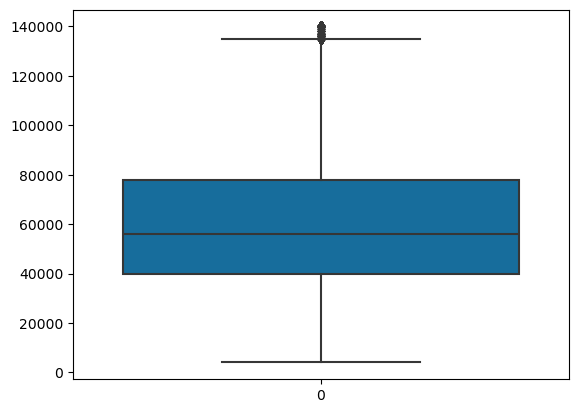

In [ ]:
sns.boxplot(loan_data['annual_inc'])

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [ ]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     56000.0
0.75     77970.5
0.90    100000.0
0.95    117000.0
0.97    124000.0
0.98    129000.0
0.99    135000.0
Name: annual_inc, dtype: float64

In [ ]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: >

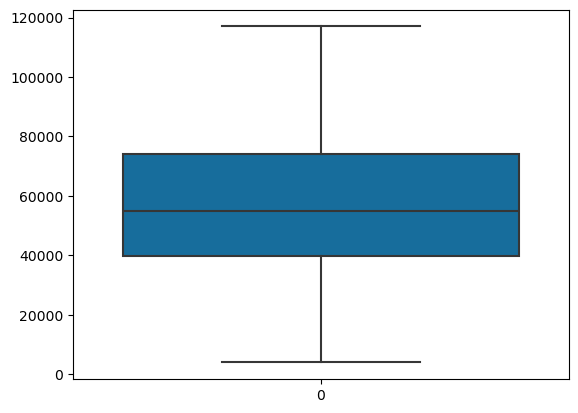

In [ ]:
sns.boxplot(loan_data.annual_inc)

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv 

<Axes: >

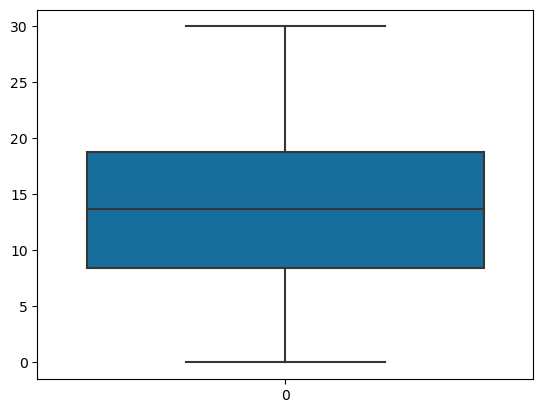

In [ ]:
sns.boxplot(loan_data.dti)

<Axes: >

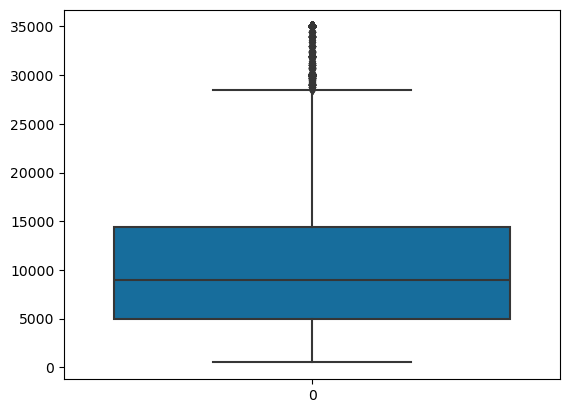

In [ ]:
sns.boxplot(loan_data.loan_amnt)

In [ ]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14400.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26000.0
0.980    28000.0
0.990    34000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

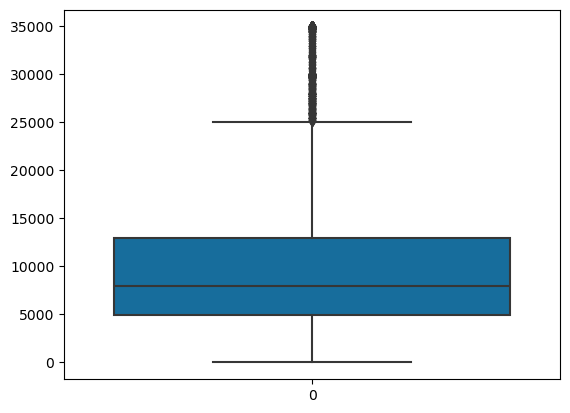

In [ ]:
sns.boxplot(loan_data.funded_amnt_inv)

In [ ]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8000.000000
0.750    13000.000000
0.900    19150.000000
0.950    23175.000000
0.970    24923.518770
0.975    25000.000000
0.980    26000.000000
0.985    28701.190382
0.990    30000.000000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

## Visualizing Categorical Data 
### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable
- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<Axes: xlabel='loan_status', ylabel='count'>

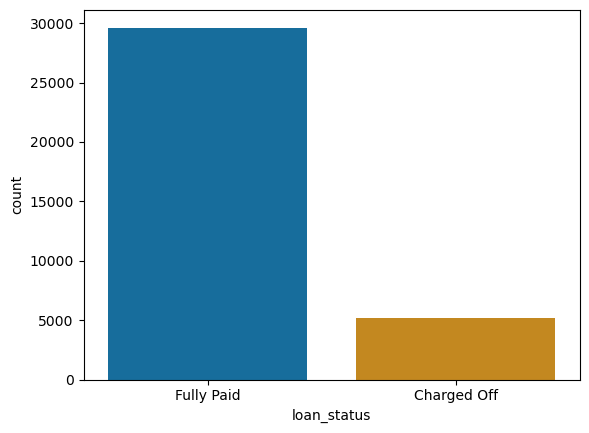

In [ ]:
sns.countplot(x = 'loan_status', data = loan_data)

##Derived Variables


In [ ]:
#converting to date type
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [ ]:
loan_data.dtypes

id                              int64
loan_amnt                       int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                       int64
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
dti                           float64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_util                     object
total_acc                       int64
dtype: object

In [ ]:
#issue_d column
loan_data['issue_d_year'] = loan_data.issue_d.dt.year
loan_data['issue_d_month'] = loan_data.issue_d.dt.strftime('%b')
loan_data['issue_d_weekday'] = loan_data.issue_d.dt.weekday
#data type conversion of year and weekday
loan_data['issue_d_year'] = loan_data['issue_d_year'].astype(object)
loan_data['issue_d_weekday'] = loan_data['issue_d_weekday'].astype(object)


<Axes: xlabel='issue_d_year', ylabel='count'>

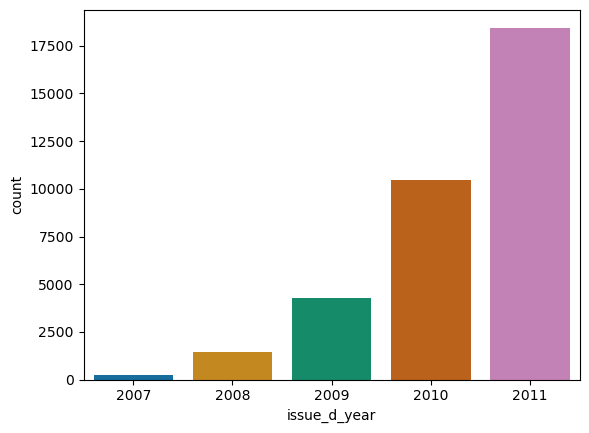

In [ ]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = loan_data[var].value_counts(normalize=True).reset_index()

sns.countplot(x = 'issue_d_year', data = loan_data)






<Axes: xlabel='issue_d_month', ylabel='count'>

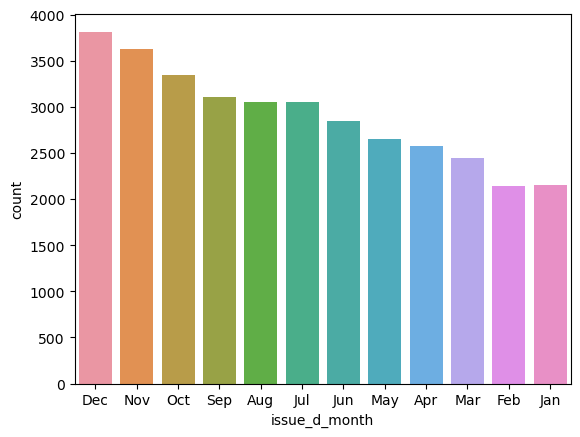

In [ ]:
sns.countplot(x = 'issue_d_month', data = loan_data)

**Observations**:<br>
The lending club(LC) has doubling loan issues every year. <br>
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec. <br>

<Axes: xlabel='term', ylabel='count'>

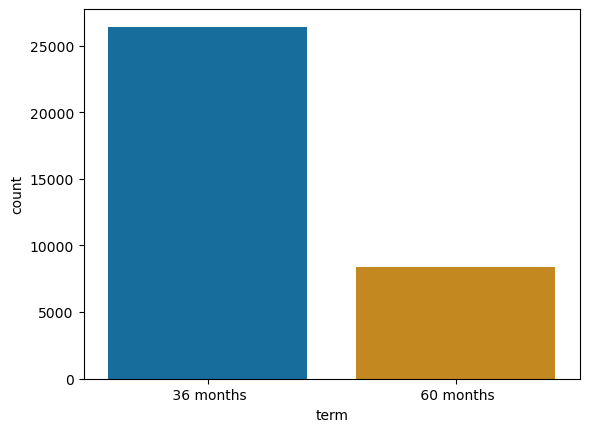

In [ ]:
sns.countplot(x = 'term', data = loan_data)

**Observations**:<br>
Barrowrs have taken 36 months tenure more than 60 months.

<Axes: xlabel='loan_status', ylabel='count'>

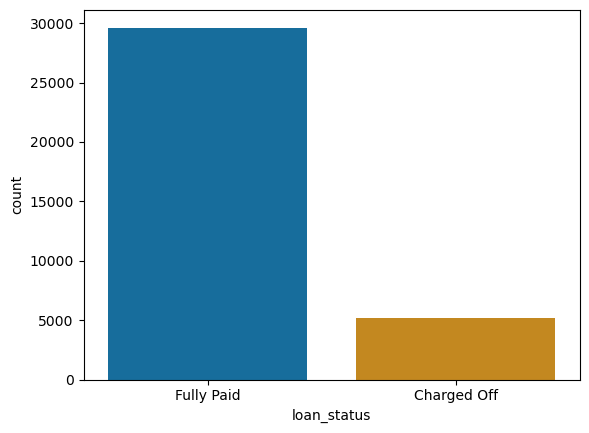

In [ ]:
sns.countplot(x = 'loan_status', data = loan_data)

**Observations**:<br>
85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

<Axes: xlabel='verification_status', ylabel='count'>

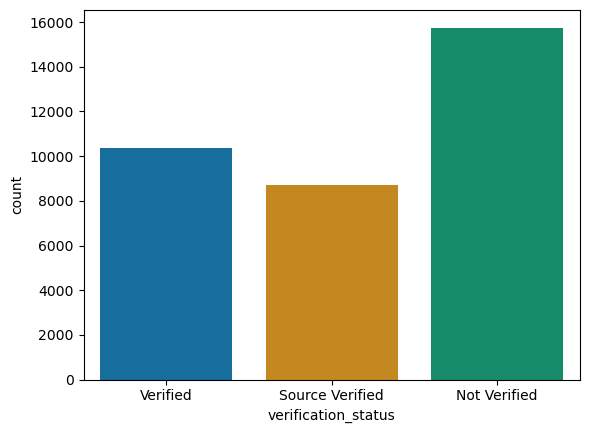

In [ ]:
sns.countplot(x = 'verification_status', data = loan_data)

**Observations**:<br>
Majority of loans were given without verification of applicants income.

<Axes: xlabel='count', ylabel='purpose'>

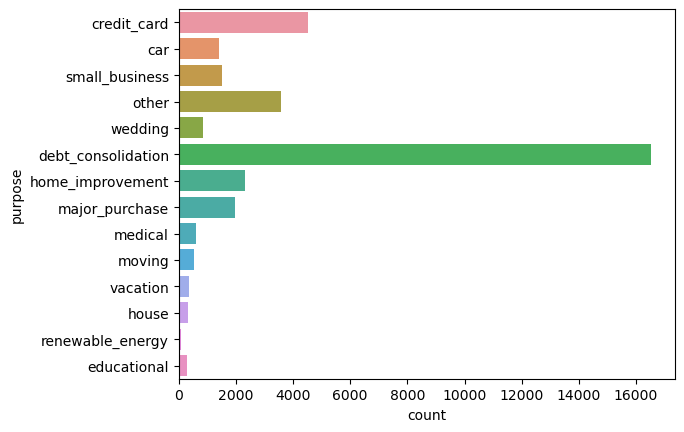

In [ ]:


sns.countplot(y = 'purpose', data = loan_data)

**Observations**:<br>
Looks line more number of people took loan for _debt consolidation_ and a very few people took for _renewable energy_

In [ ]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'issue_d_year', 'issue_d_month',
       'issue_d_weekday'],
      dtype='object')

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

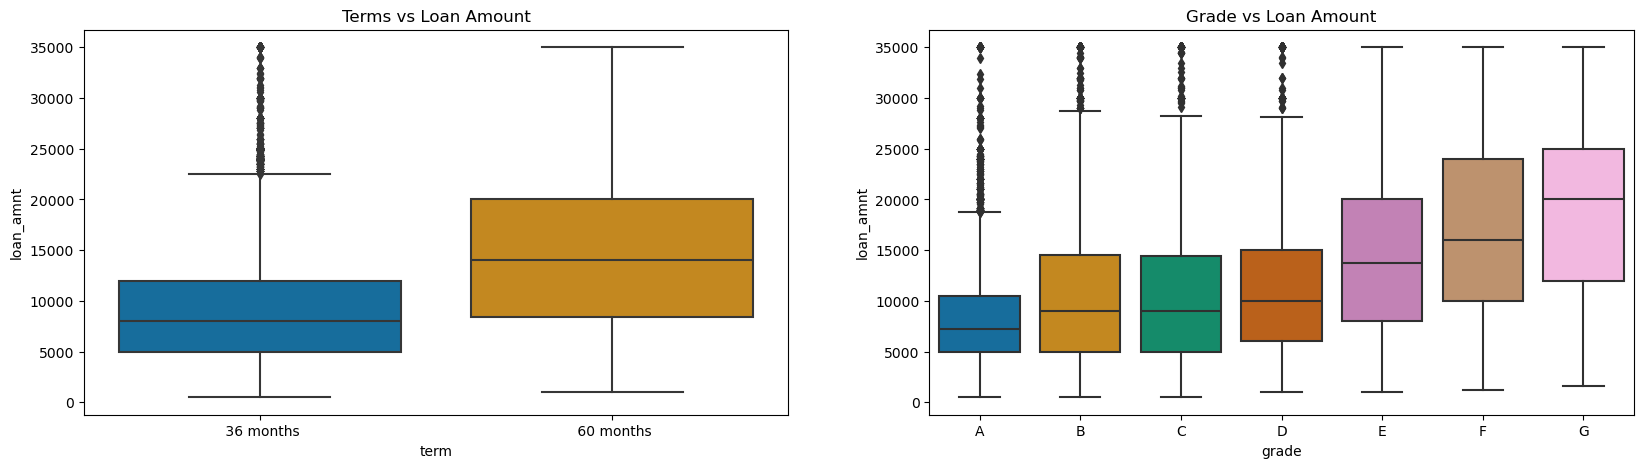

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.loan_amnt, data=loan_data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.loan_amnt, order = grade_ord, data=loan_data)

**Observations**:<br>
Higher amount loans have high tenure i.e, 60 months.  
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

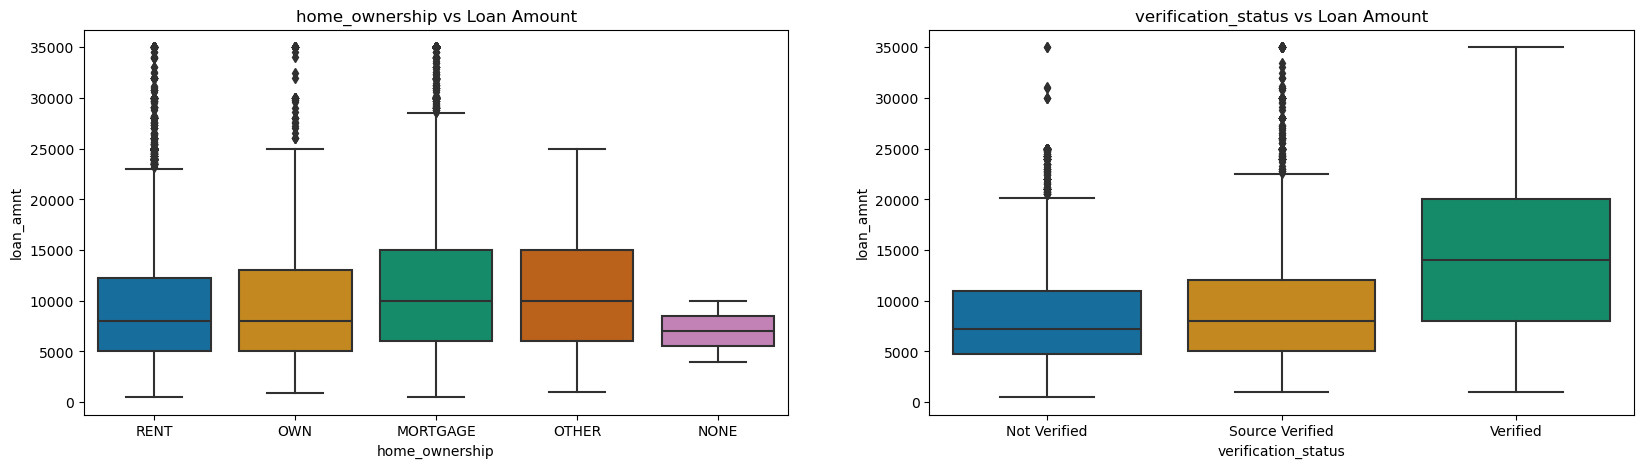

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.loan_amnt, data=loan_data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.loan_amnt, order = verification_status_ord, data=loan_data)

**Observations**:<br>
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.  
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

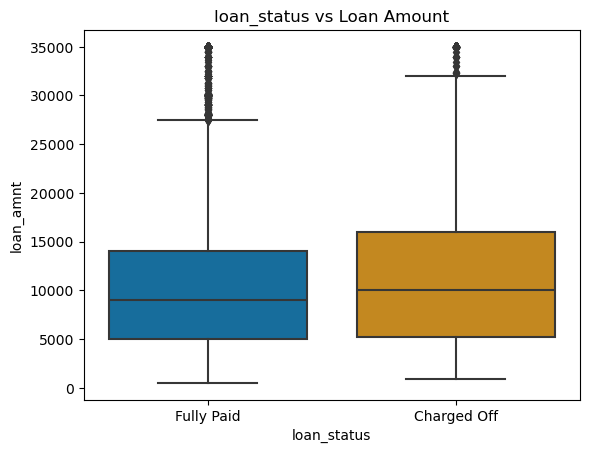

In [ ]:
sns.boxplot(x='loan_status', y=loan_data.loan_amnt, data=loan_data)
plt.title('loan_status vs Loan Amount')

**Observations**:<br>
Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Interest Rate')

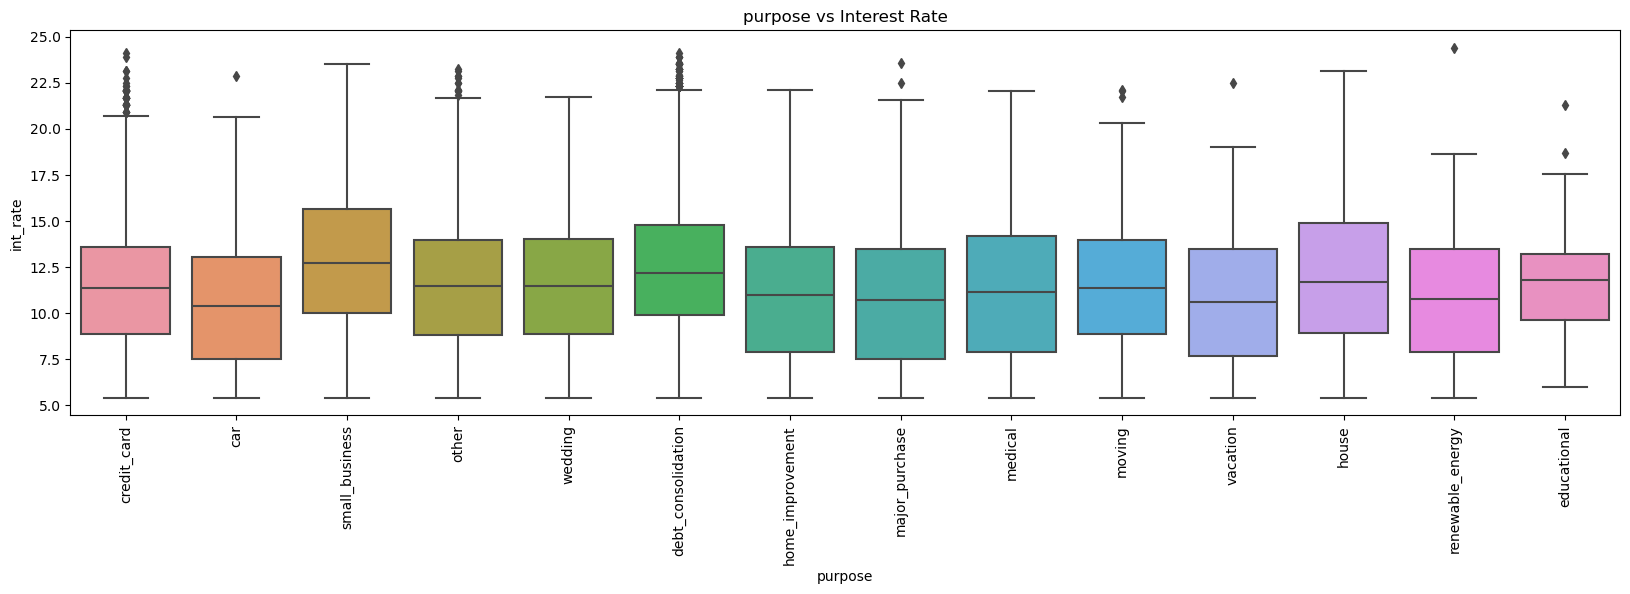

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.int_rate, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

**Observations**:  
Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

Text(0.5, 1.0, 'emp_length vs Interest Rate')

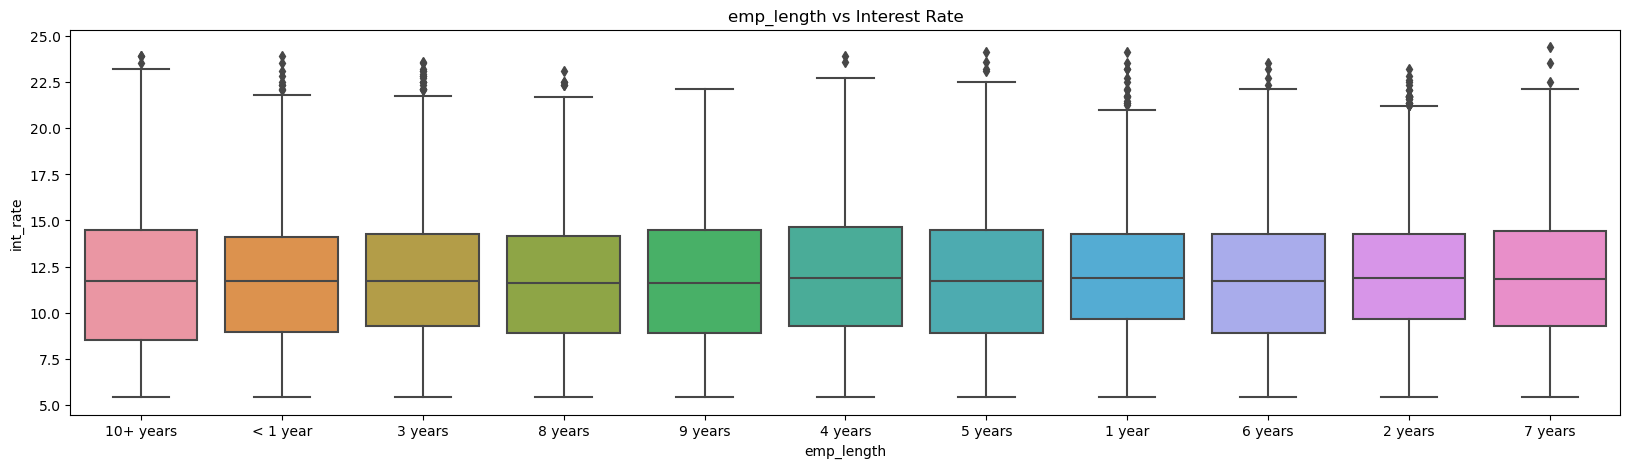

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.int_rate, data=loan_data)
plt.title('emp_length vs Interest Rate')

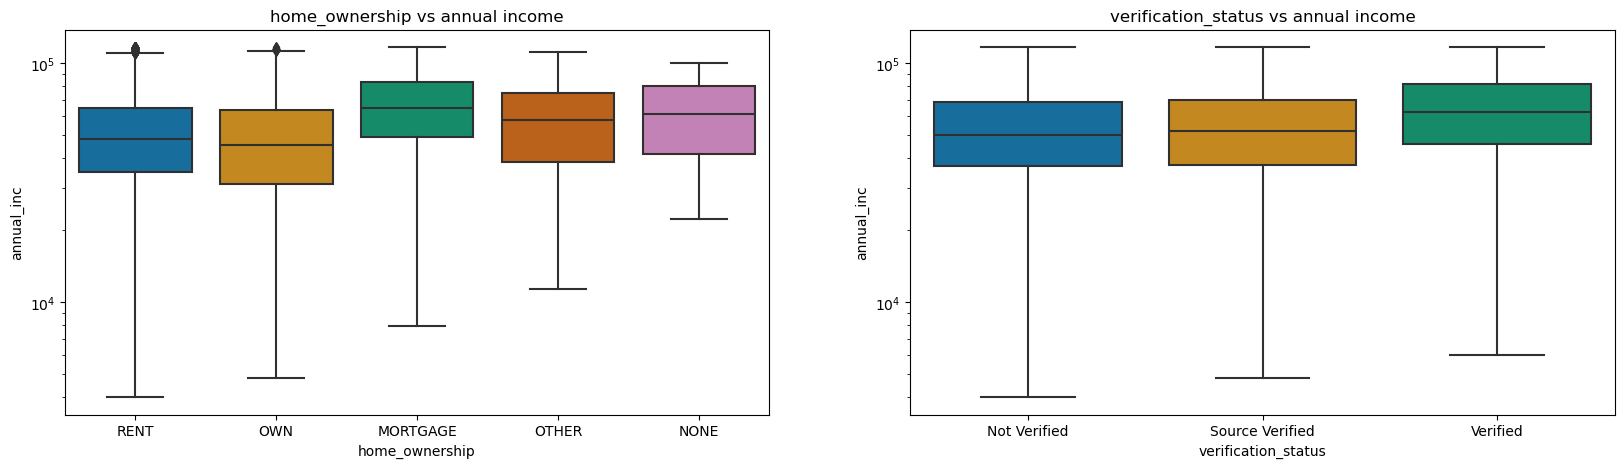

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.annual_inc, data=loan_data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.annual_inc, order = verification_status_ord, data=loan_data)
plt.yscale('log')

**Observations:**  
The home ownership status for MORTAGE has higher income.  
The income source was verfied for most of the borrower's who had higher annual incomes.

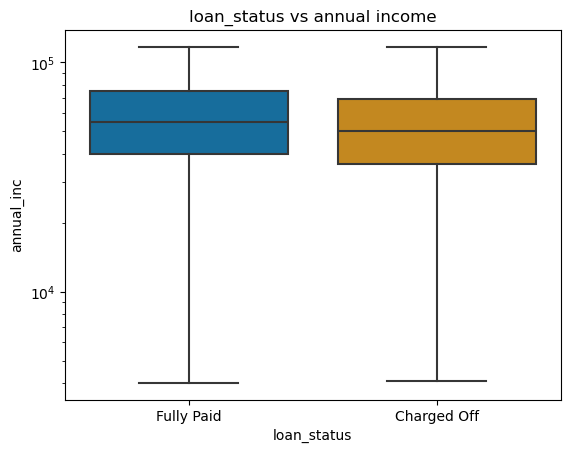

In [ ]:
sns.boxplot(x='loan_status', y=loan_data.annual_inc, data=loan_data)
plt.title('loan_status vs annual income')
plt.yscale('log')

**Observations:**    
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.  

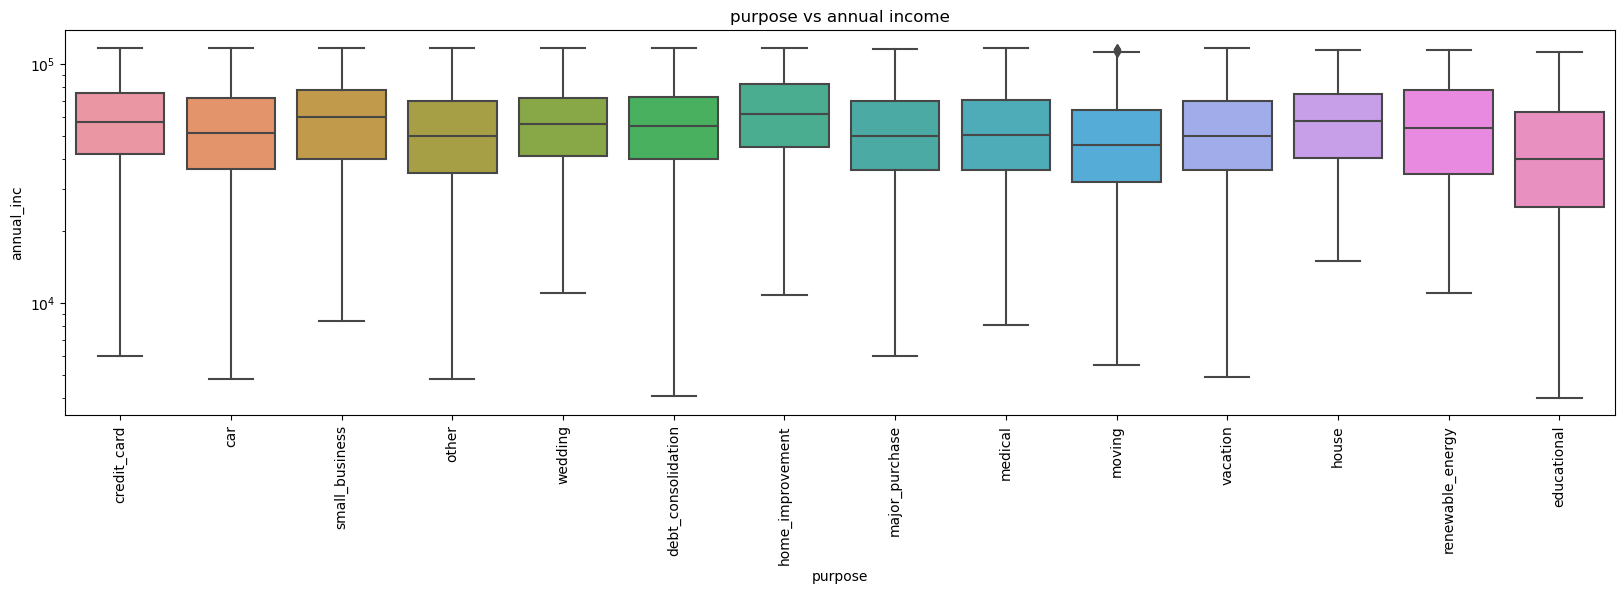

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.annual_inc, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

**Observations:**  
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

Text(0.5, 1.0, 'loan_status vs dti')

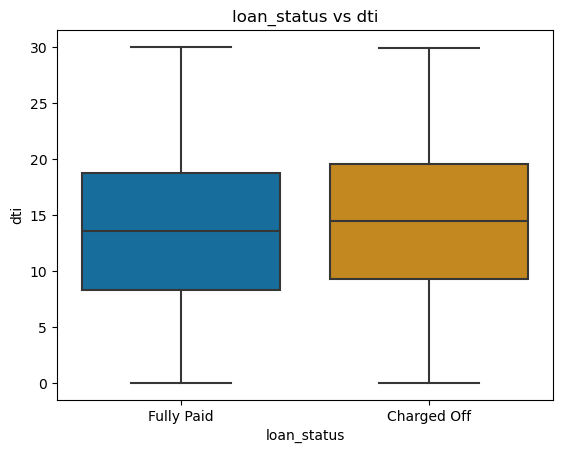

In [ ]:
sns.boxplot(x='loan_status', y=loan_data.dti, data=loan_data)
plt.title('loan_status vs dti')

**Observations**  
Borrowers with high DTI has bit more probability to default

Text(0.5, 1.0, 'purpose vs dti')

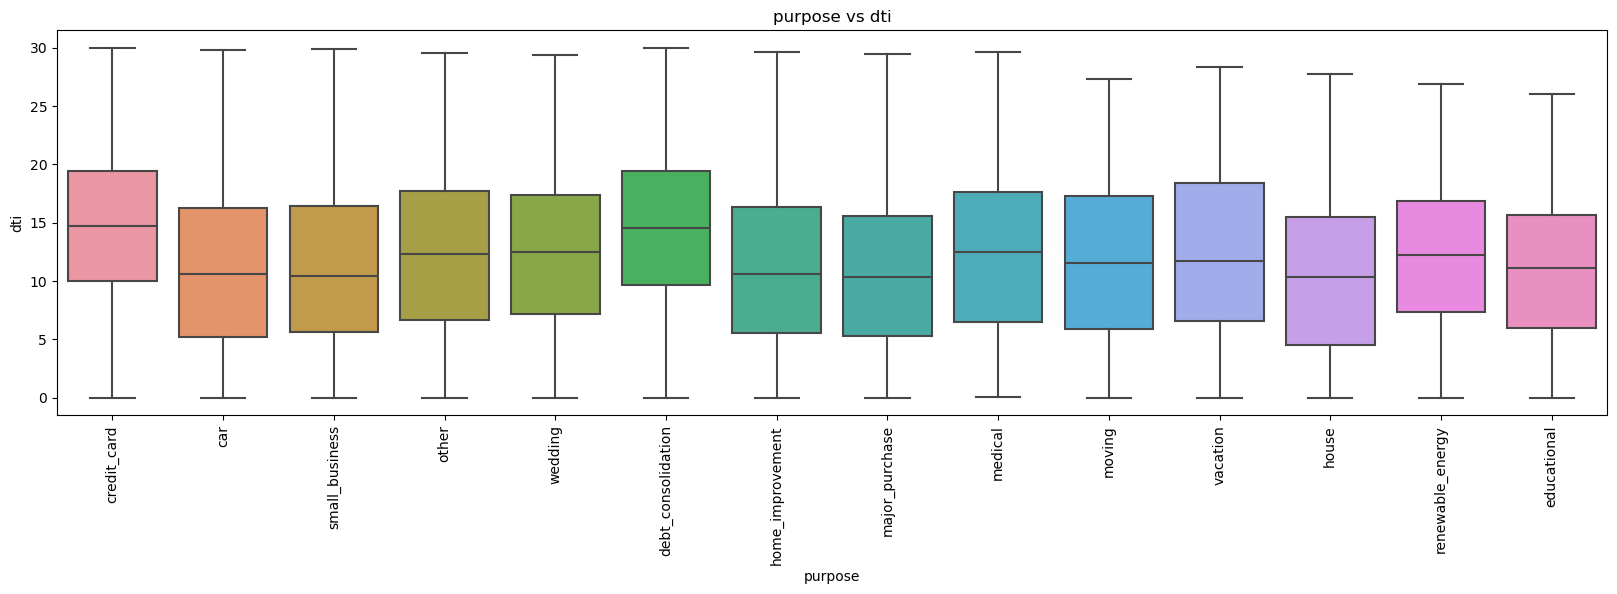

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.dti, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

**Observations**:  
Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

# annual_inc

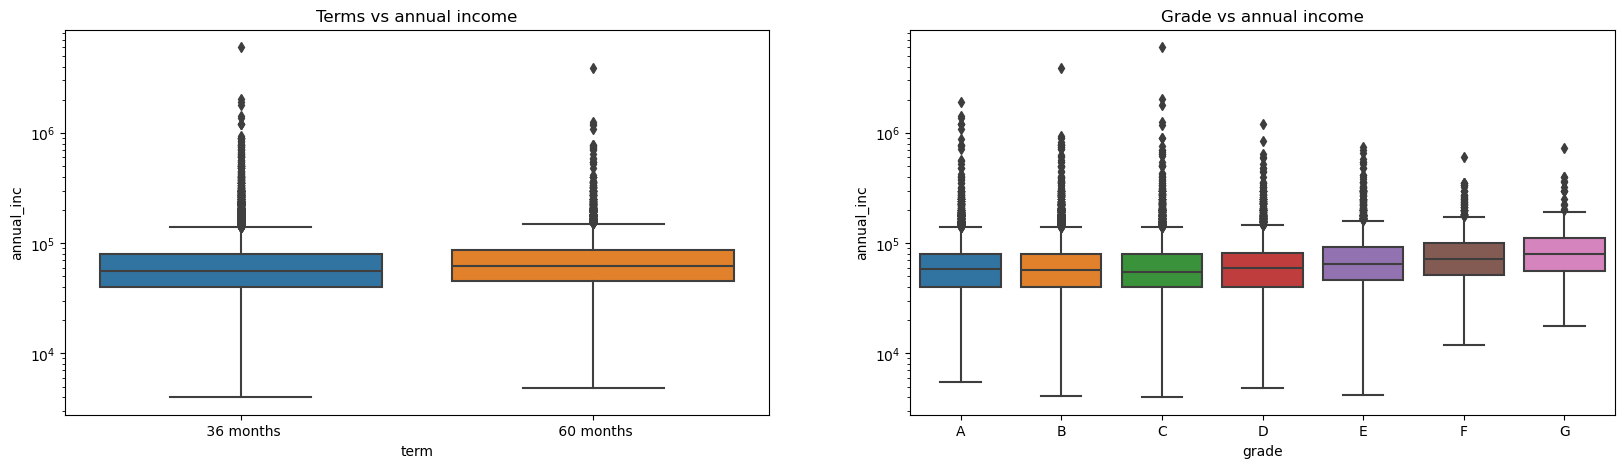

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.annual_inc, data=loan_data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.annual_inc, order = grade_ord, data=loan_data)
plt.yscale('log')

**Observations:**  
Comparatively Annual income is higher for lower grades.

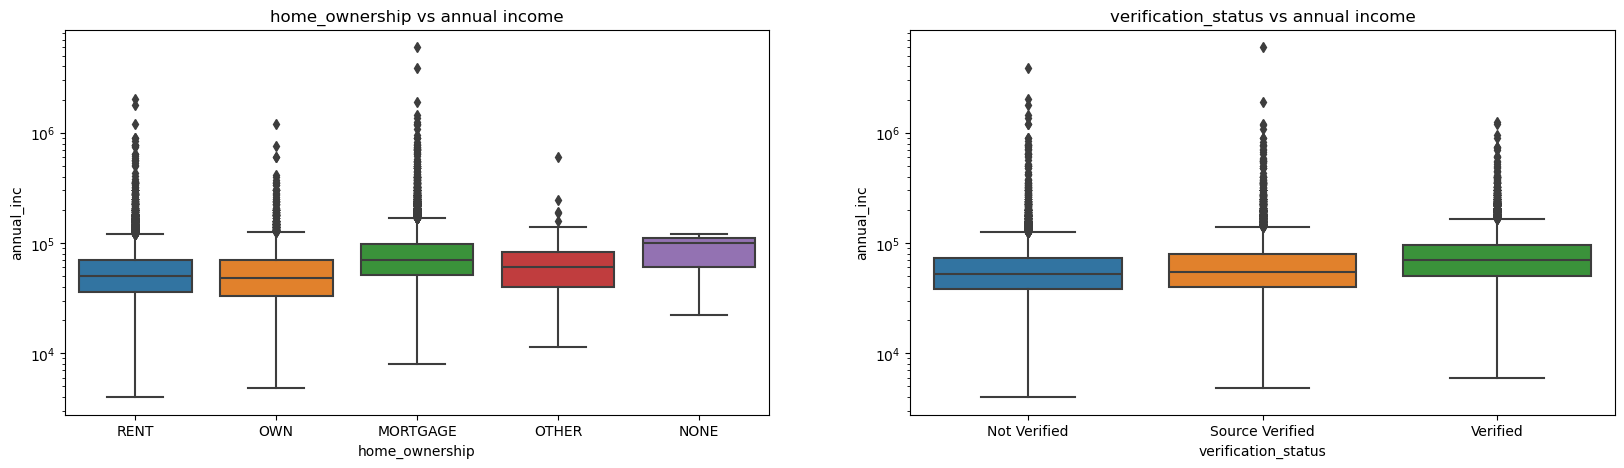

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.annual_inc, data=loan_data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.annual_inc, order = verification_status_ord, data=loan_data)
plt.yscale('log')

**Observations:**  
The home ownership status for MORTAGE has higher income.  
The income source was verfied for most of the borrower's who had higher annual incomes.

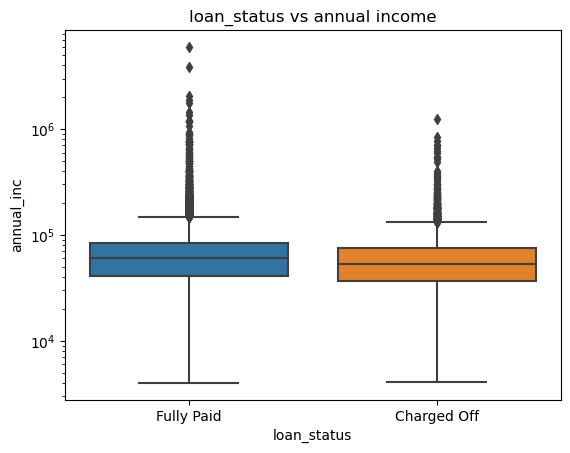

In [ ]:
sns.boxplot(x='loan_status', y=loan_data.annual_inc, data=loan_data)
plt.title('loan_status vs annual income')
plt.yscale('log')

**Observations:**    
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.  

# DTI
Debt to Income Ratio

<Axes: title={'center': 'Grade vs dti'}, xlabel='grade', ylabel='dti'>

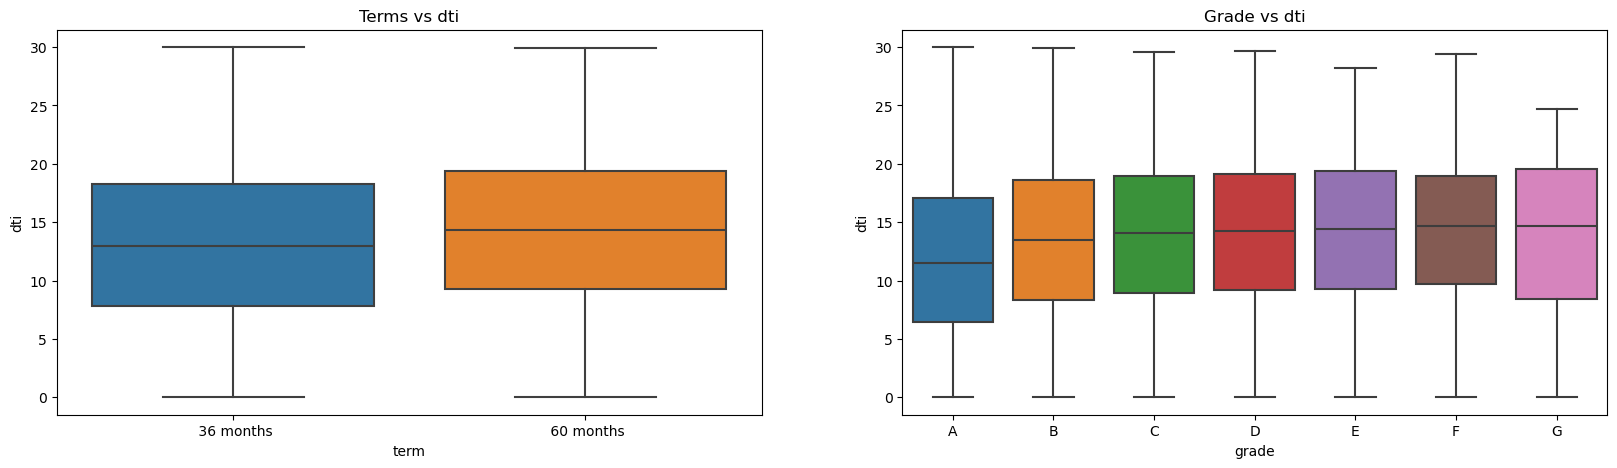

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.dti, data=loan_data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.dti, order = grade_ord, data=loan_data)

<Axes: title={'center': 'verification_status vs dti'}, xlabel='verification_status', ylabel='dti'>

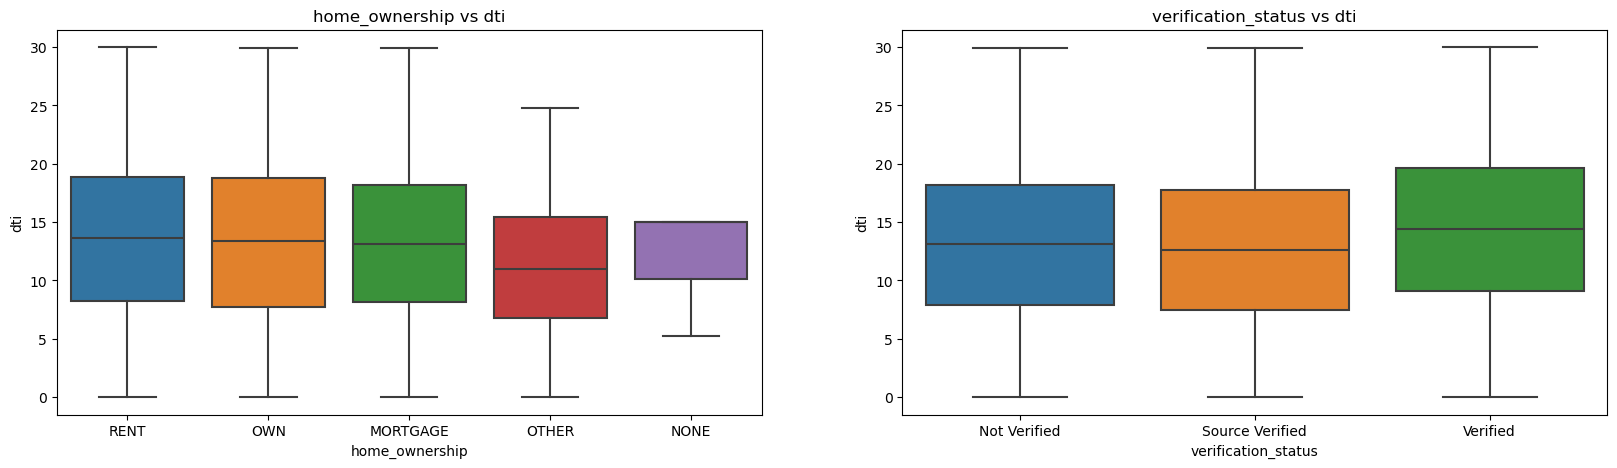

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.dti, data=loan_data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.dti, order = verification_status_ord, data=loan_data)

Text(0.5, 1.0, 'purpose vs dti')

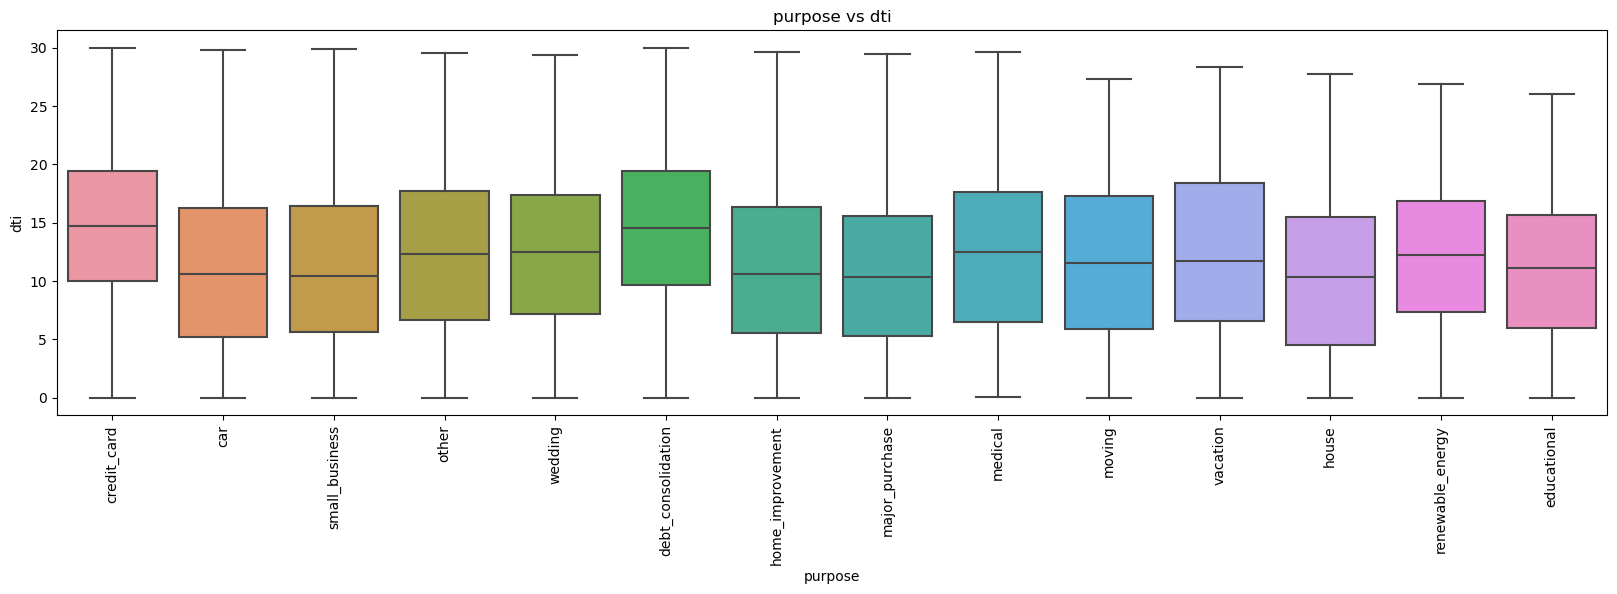

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.dti, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

Text(0.5, 1.0, 'emp_length vs dti')

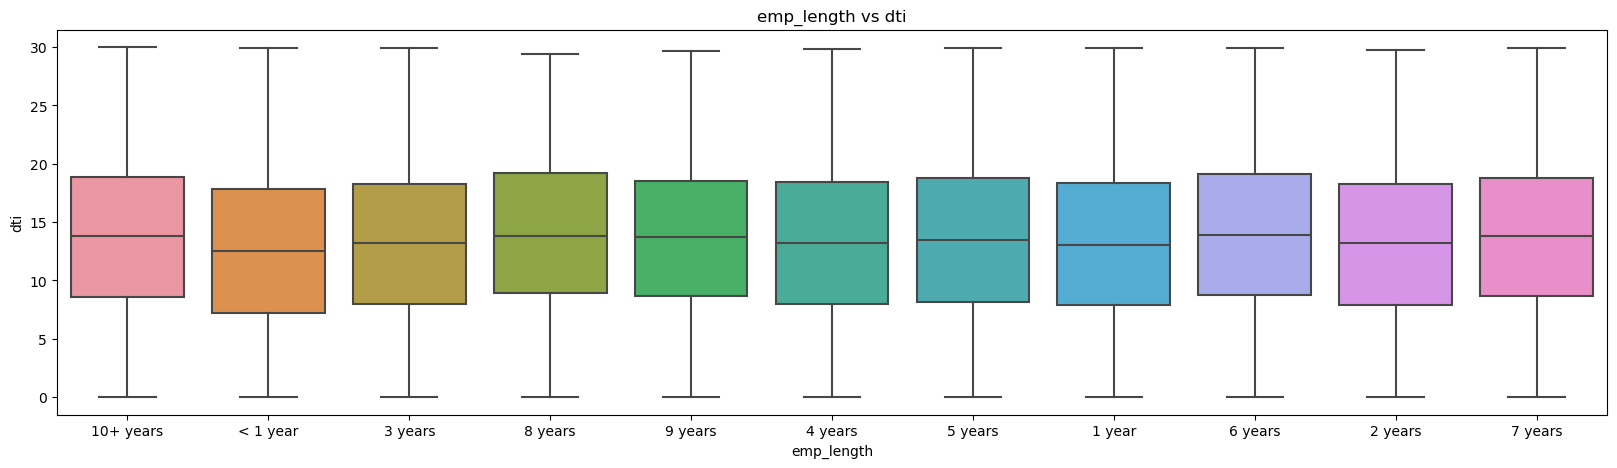

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.dti, data=loan_data)
plt.title('emp_length vs dti')

**Observation**:   
--DTI is bit high for people who got more tenure i.e., 60 months.  
--A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.</br>
--People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.</br>
--Borrowers with high DTI has bit more probability to default</br>
--People who took loan for _credit card_ and _debt consolidation_ purpose has more DTI than other purposes.</br>
--The dti is pretty much similar for barrowers with all the employment length.

# pub_rec
Number of derogatory public records

In [ ]:
df = loan_data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x/x.sum())
df

,pub_rec,term,id,proportion
0,0,36 months,27582,0.76
1,0,60 months,8925,0.24
2,1,36 months,1467,0.73
3,1,60 months,546,0.27
4,2,36 months,38,0.79
5,2,60 months,10,0.21
6,3,36 months,7,1.00
7,4,36 months,2,1.00


<Axes: title={'center': 'Grade vs Public records'}, xlabel='pub_rec', ylabel='proportion'>

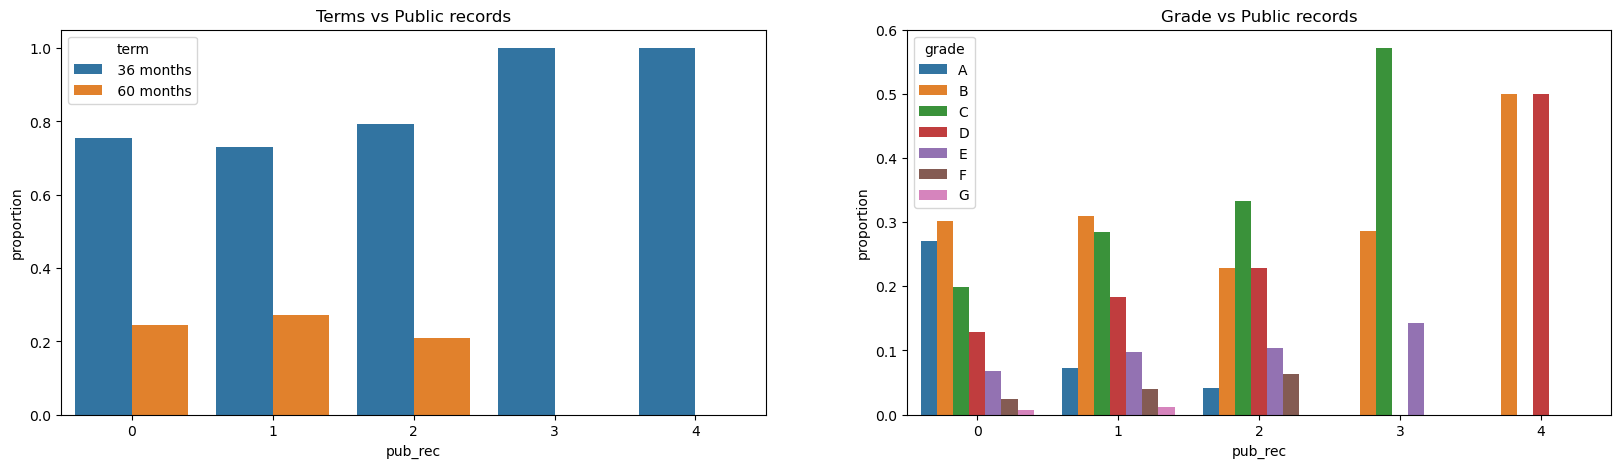

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = loan_data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

Text(0.5, 1.0, 'Verification status vs Public records')

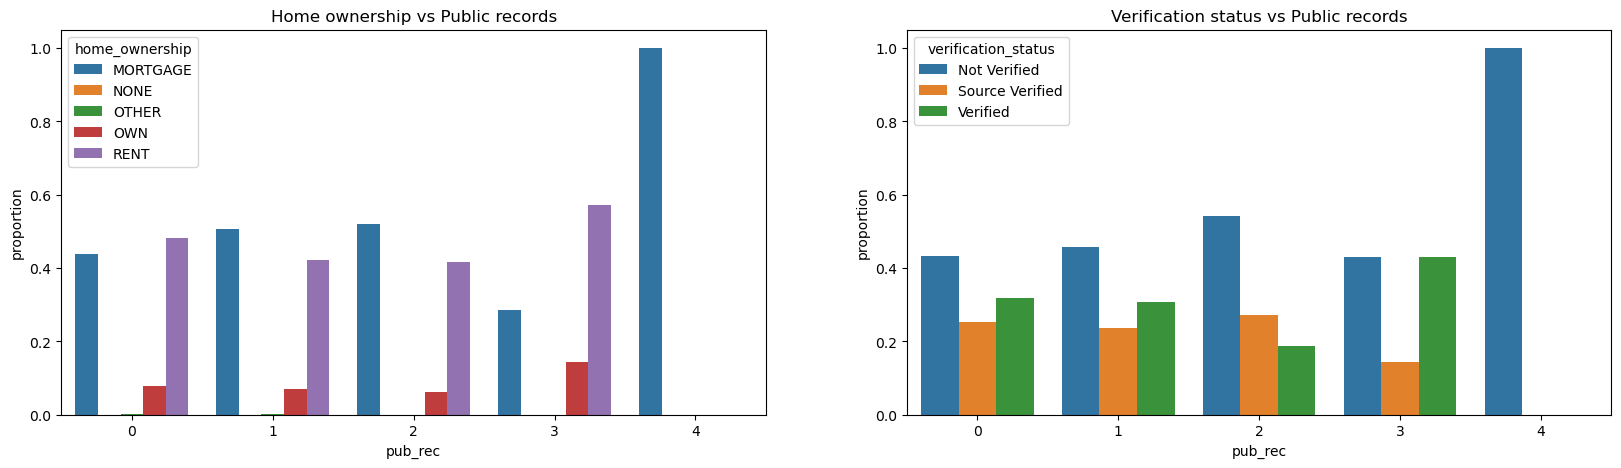

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = loan_data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = loan_data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')

Text(0.5, 0.98, 'loan status vs Public records')

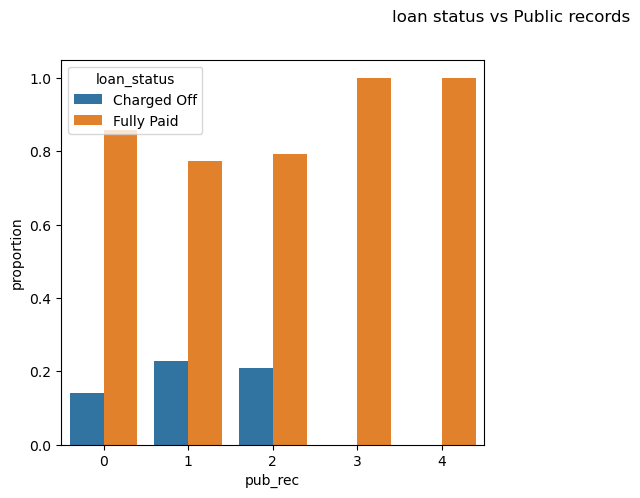

In [ ]:
#Proportion of values for each category
df = loan_data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.suptitle('loan status vs Public records')

Text(0.5, 1.0, 'Employee length vs Public records')

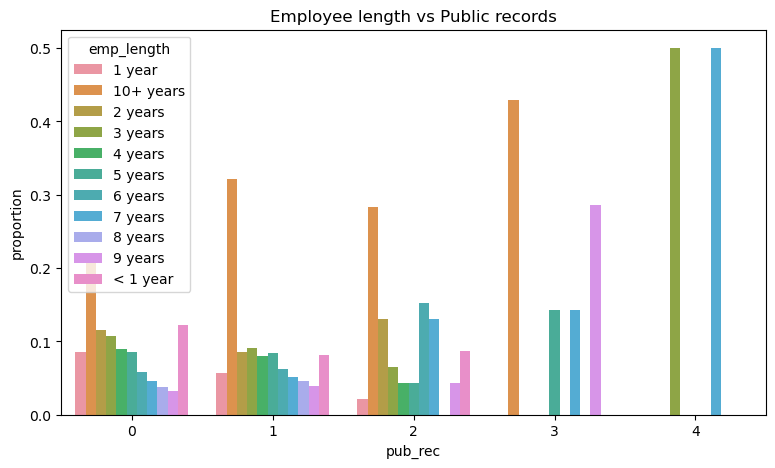

In [89]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = loan_data.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')

**Observations**:  
* Borrwers higher public derogatory records took loan for 36 months tenure. where as 80% and 20% distribution between 36 and 60months tenure for lower public derogatory records borrowers.  
* We can see the grades are really showing some pattern. A grade people are having less derogatory records then other grades.  
* Exceptionally C,D,E graded people are having high pub_recs.  
* Borrowers with 4 public Derogatory records are high in mortgage owned house category and also Not verified Catogry of verification status.
* The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because   there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

## Bivariate Analysis

### Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

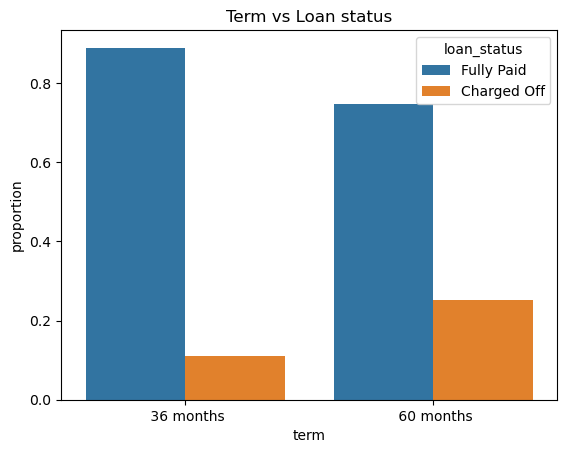

In [91]:
#Proportion of values for each category
df = loan_data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term')['id'].transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

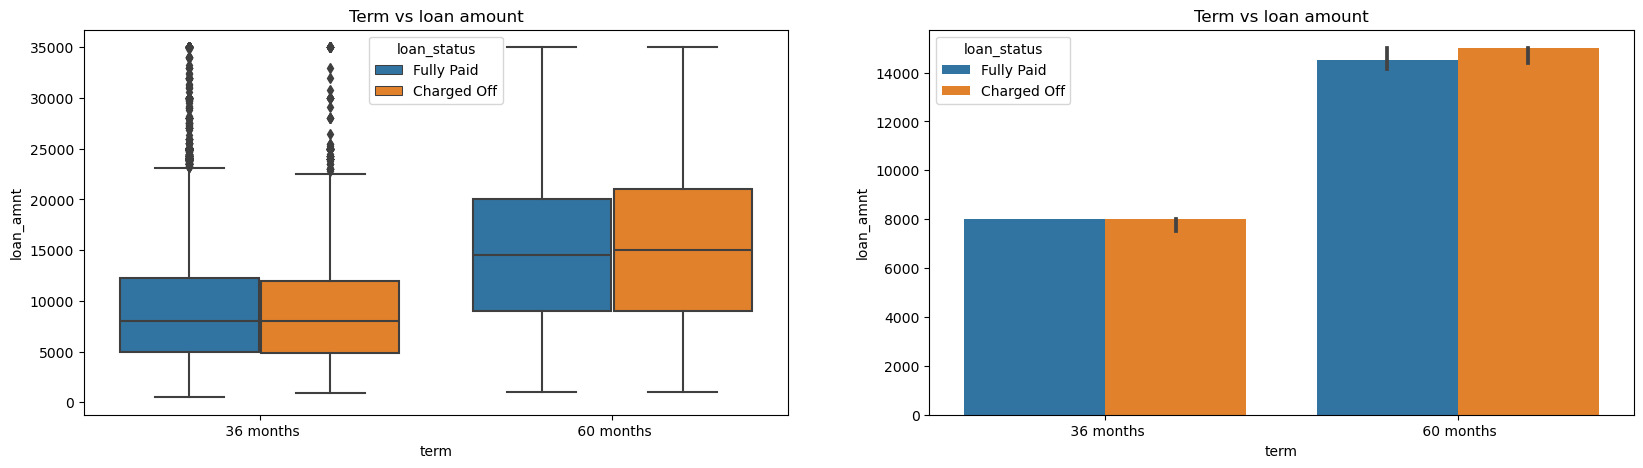

In [92]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

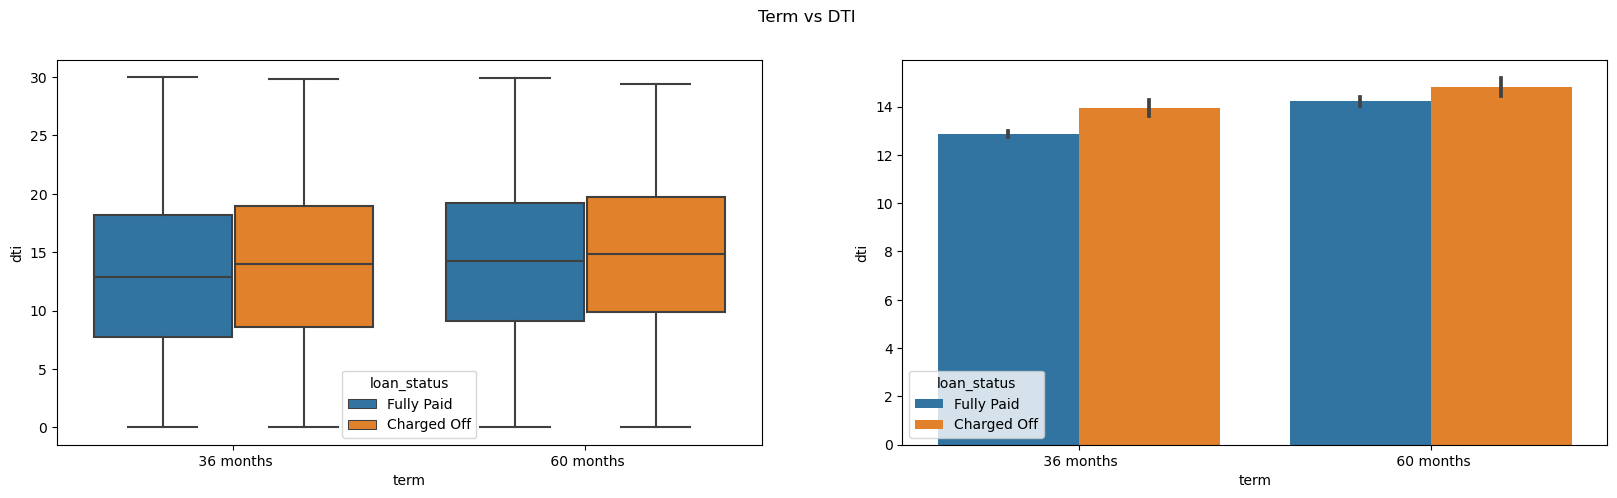

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Observations**:  
* Looks like there  are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure. 
* Loan amount is not a decider for defaults in both 36 adn 60 months.   
* Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.
* For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.
* Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

### Grade

In [95]:
#Sorting Grades from A to G
grade_ord = loan_data.grade.unique()
grade_ord.sort()

Text(0.5, 1.0, 'Grade vs Loan status')

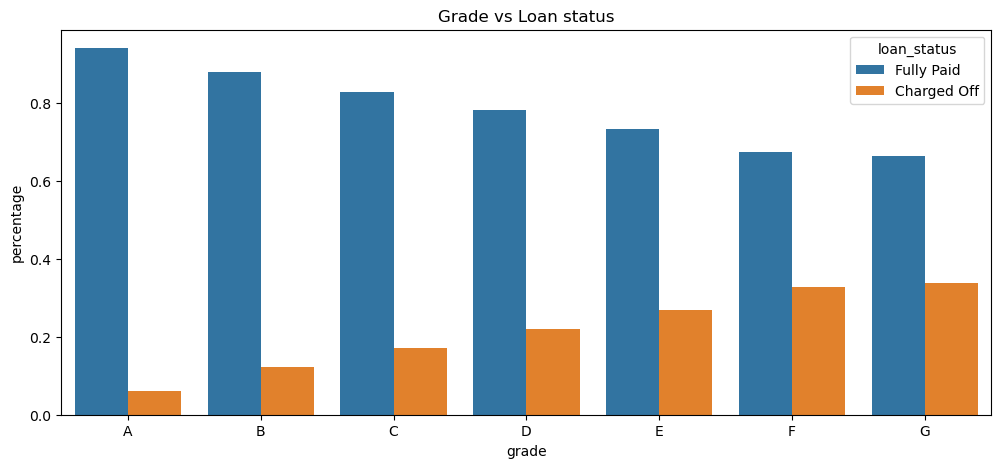

In [96]:
df = loan_data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

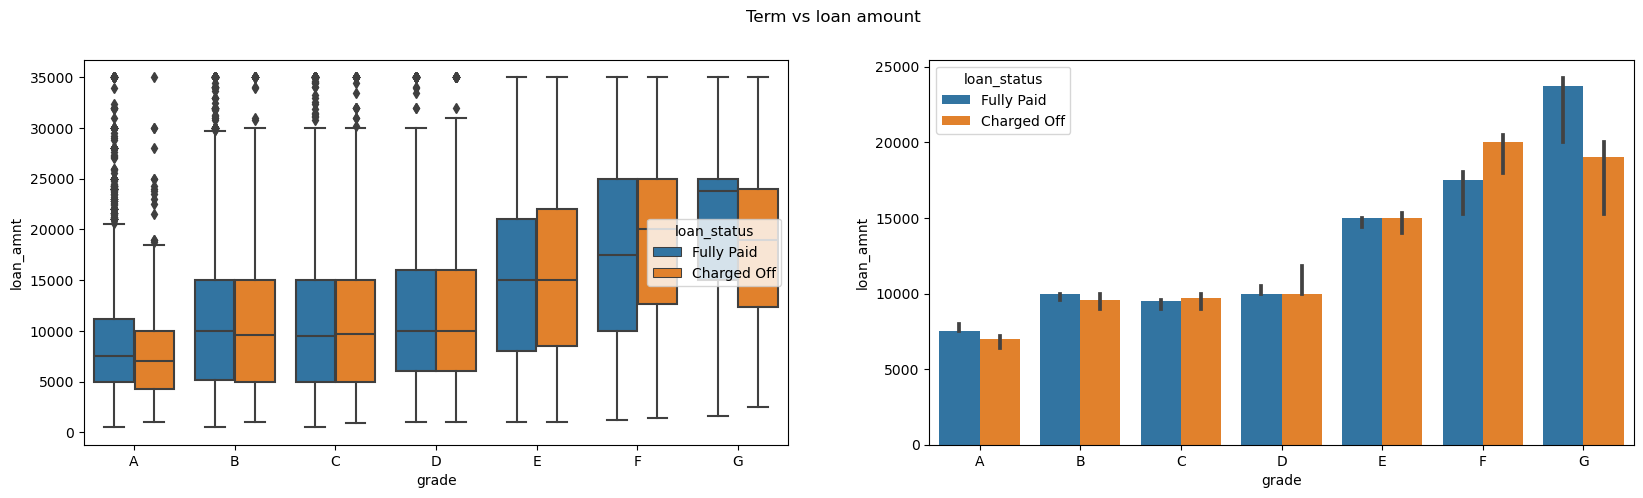

In [97]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

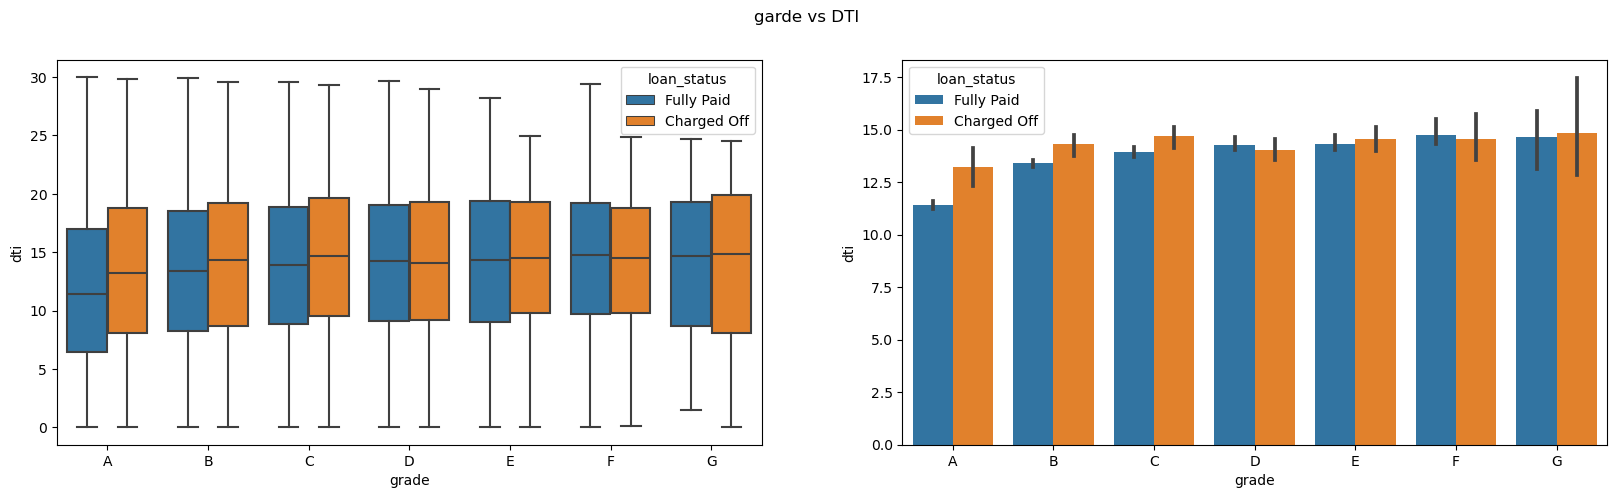

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan_data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=loan_data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

**Observations:**  
* The above graph clearly says the Charged off increases as grades decreases.
* For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.  
* The lower grade people has taken higher amount of loans and also they are more prone to default the loan.
* As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.
* There is not much change in dti in each grade and loan status.

### Employment Length

Text(0.5, 1.0, 'Grade vs Loan status')

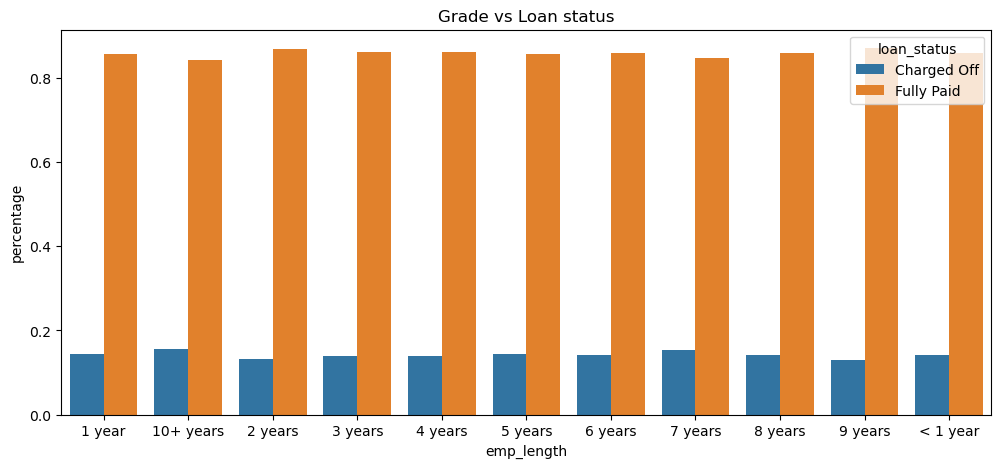

In [101]:
df = loan_data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

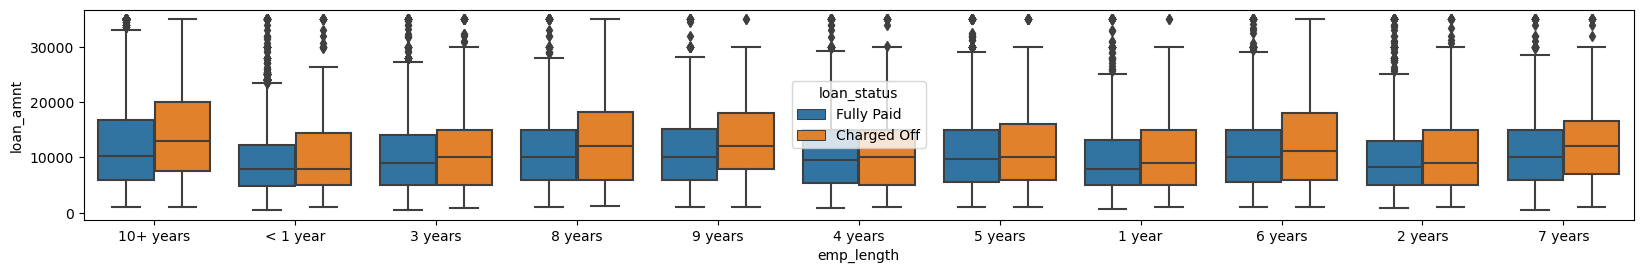

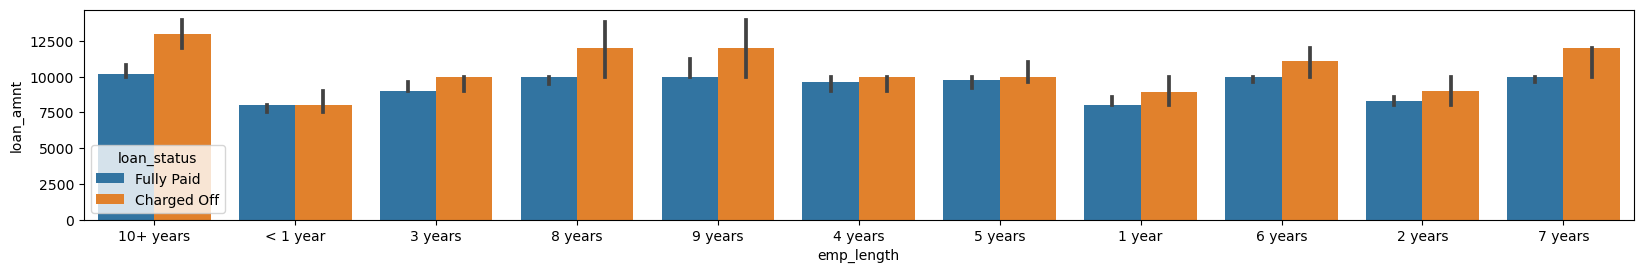

In [102]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.show()

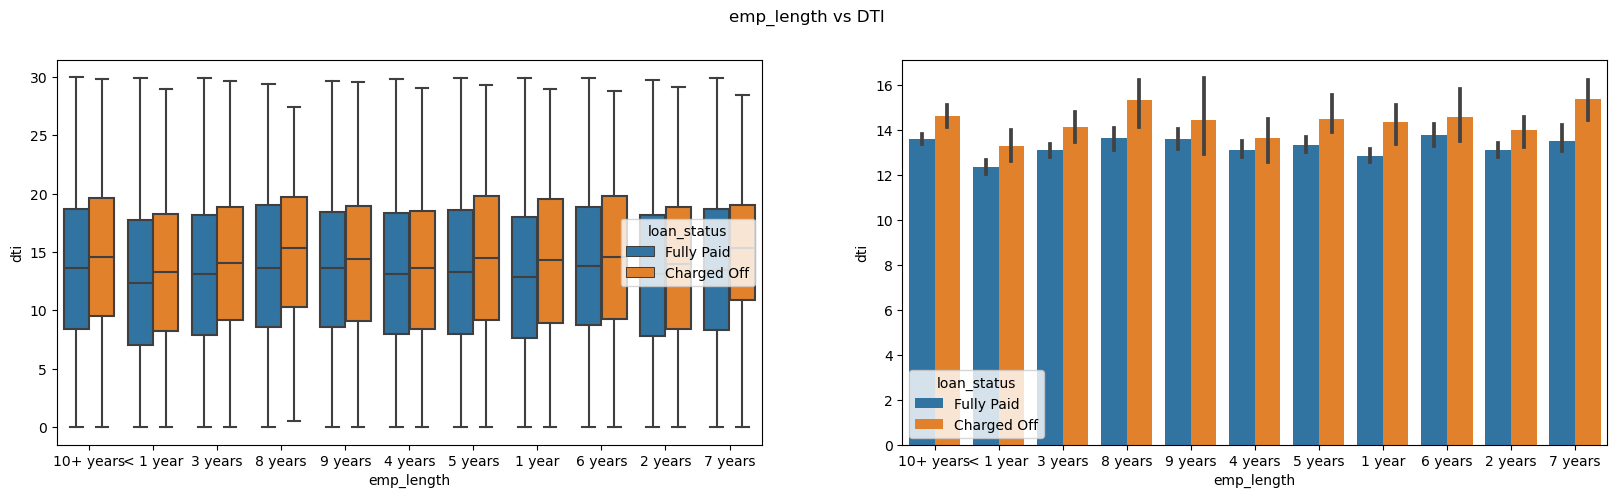

In [104]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

**Observations:**
* There is not big changes or pattern observed defaulters across employment lengths.
* Borrowers with higher employment lengths and took more loan amounts got more default rate.
* Irrespictive of employment length loans with more interest rates got defaulted more.
* Employment Length and DTI are not showing any patterns towards defaults.

### Home Ownership

Text(0.5, 1.0, 'Home Ownership vs Loan status')

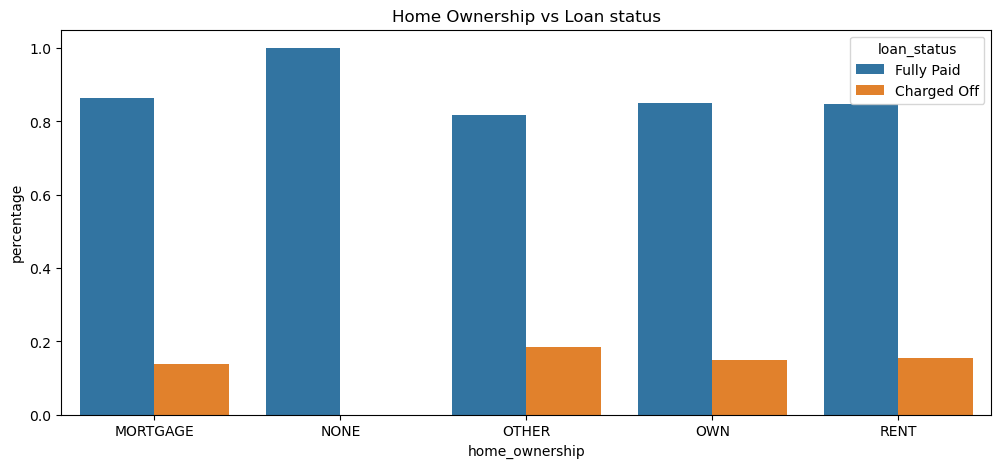

In [106]:
df = loan_data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

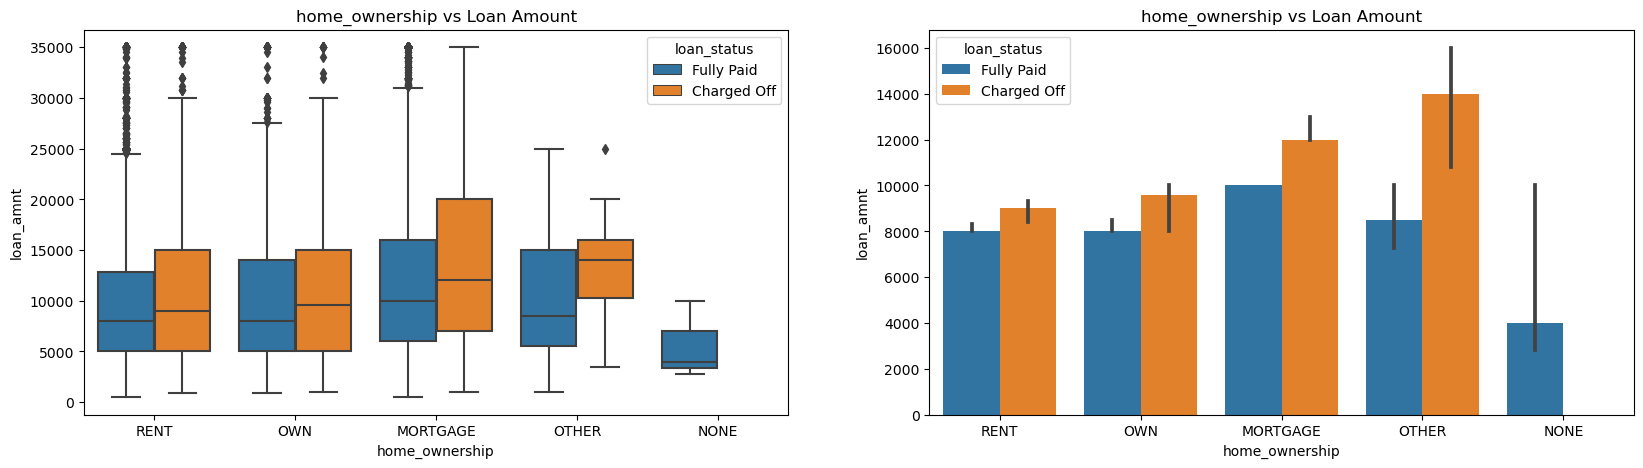

In [108]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

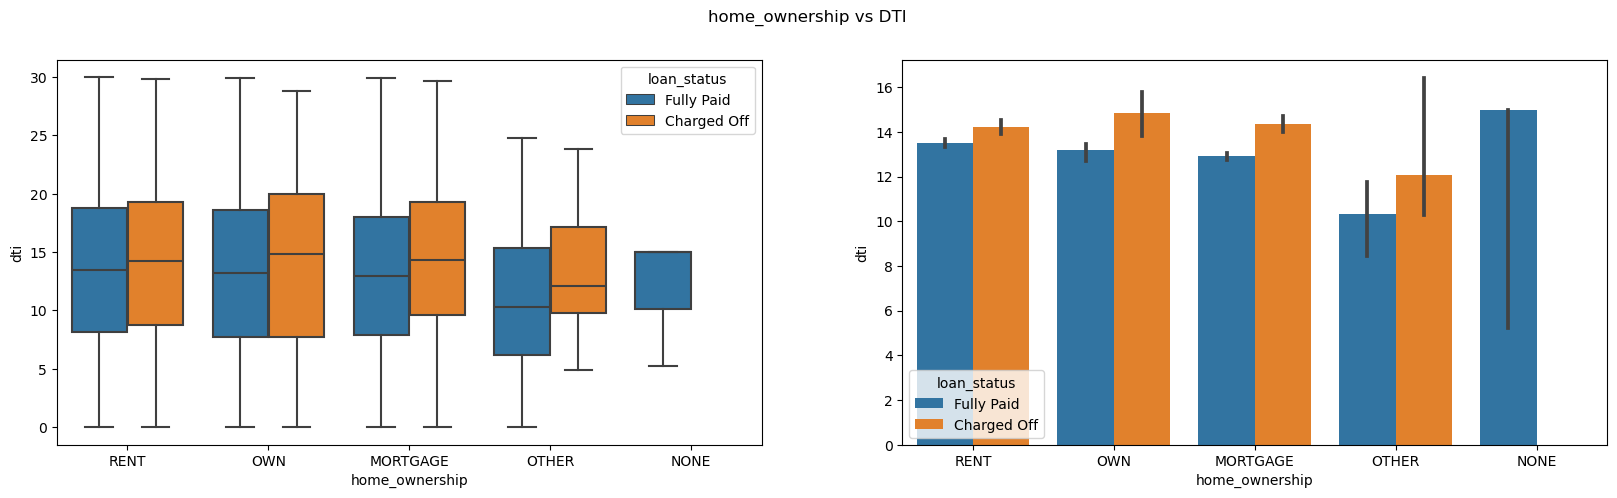

In [109]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

**Observations:**   
* There is bit high percentage of defaults are recorded in _other_ home ownership category.  
* Irrespictive of Home owner ship, when the interest rate is high the dafault rate also high.
* Borrowers who took higher loan amounts defaulted more than others.  
* Borrowers in _other_ home ownership category has less dti than other categories.  
* There is equal posibility of home owners defaulting for all the home ownerships.

### Verfication Status

Text(0.5, 1.0, 'Grade vs Loan status')

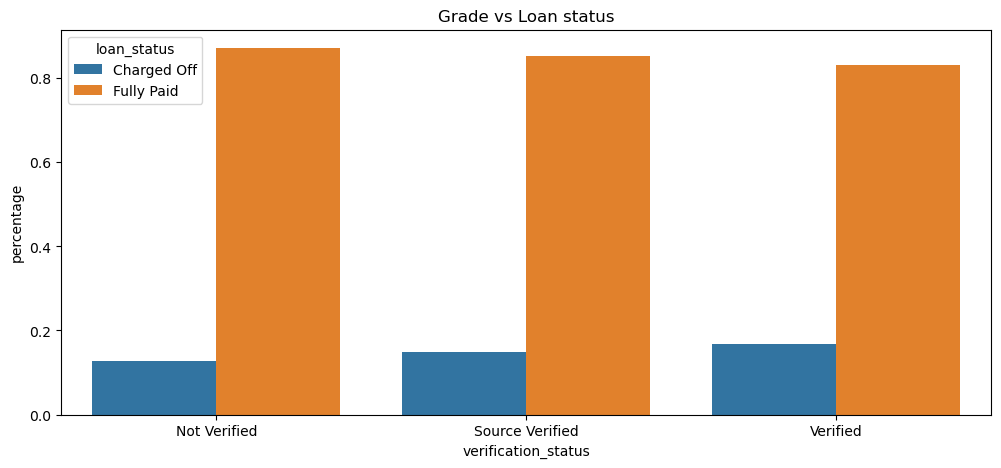

In [112]:
df = loan_data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

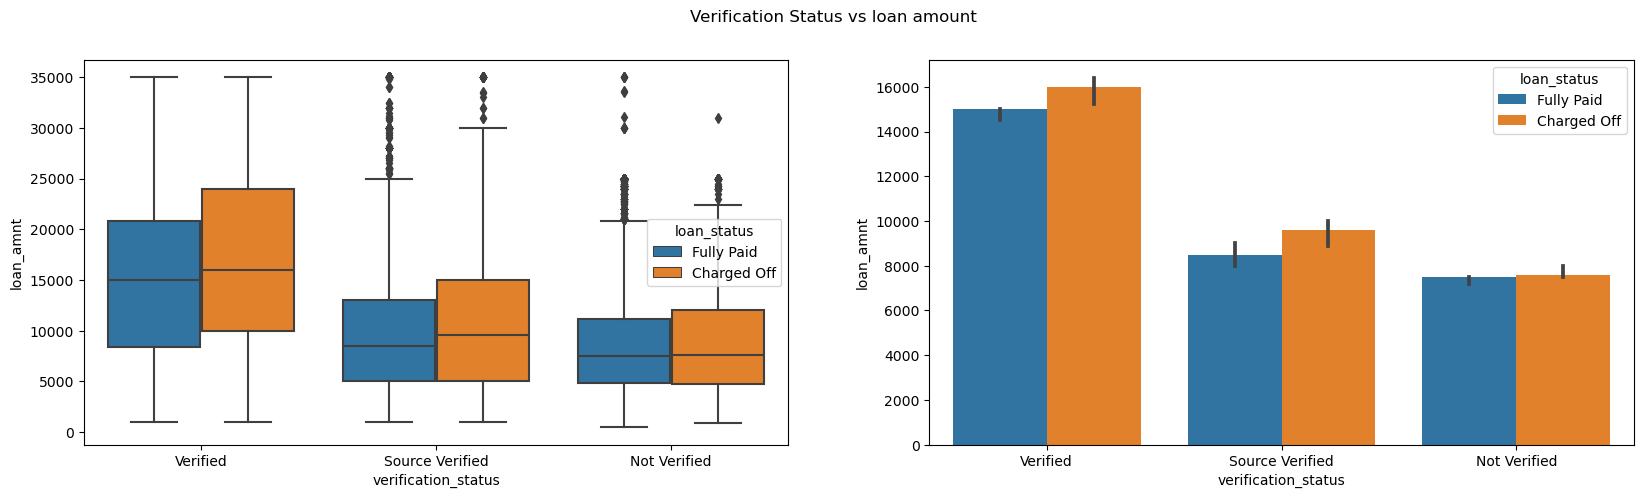

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

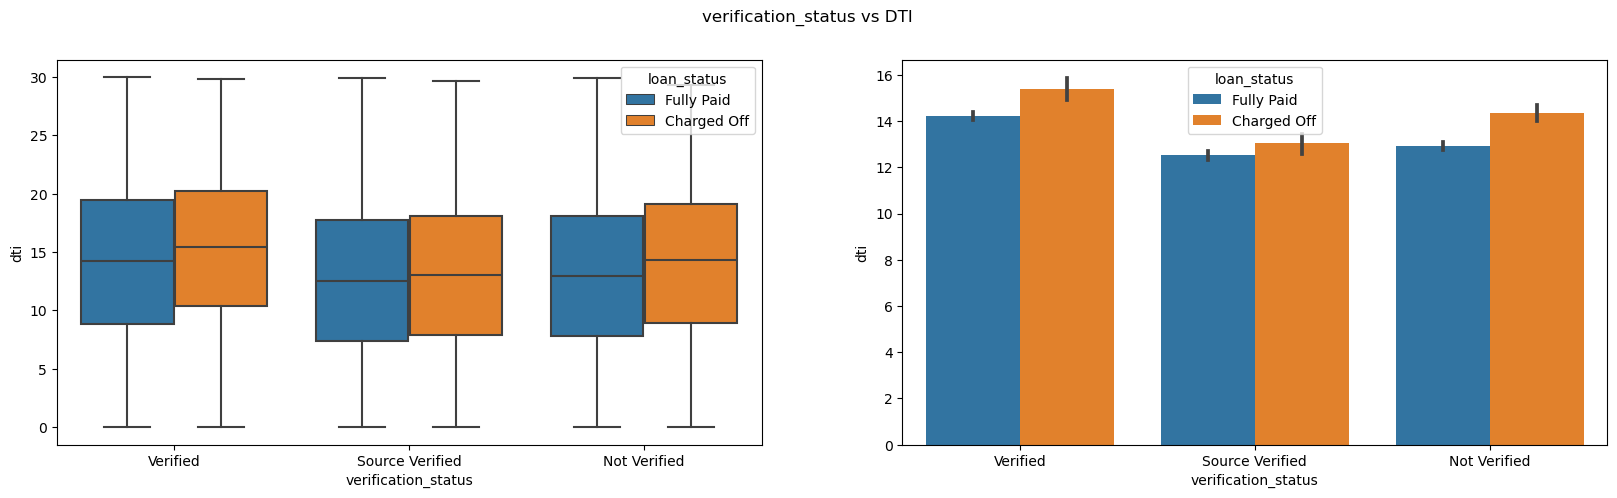

In [114]:

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

**Observations:**  
* There isn't big change in charged of loans for all varification status.
* Verified loans are given more loan amounts compared to others.
* There is a slight increase in loan amount for verified and source verified loan when they are defaulted.
* Irrespective of verification status higher interest rates are incurring default of loan.
*  There is slight increase in the dti mean for defaulted laons for all the verification status categories.

### Purpose

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

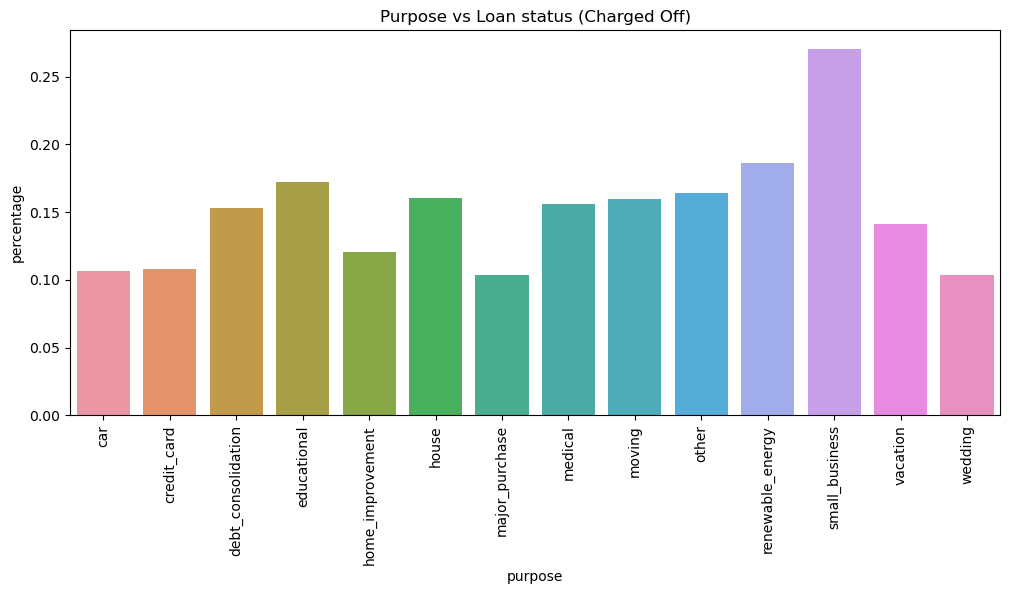

In [116]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose')['id'].transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

<Figure size 640x480 with 0 Axes>

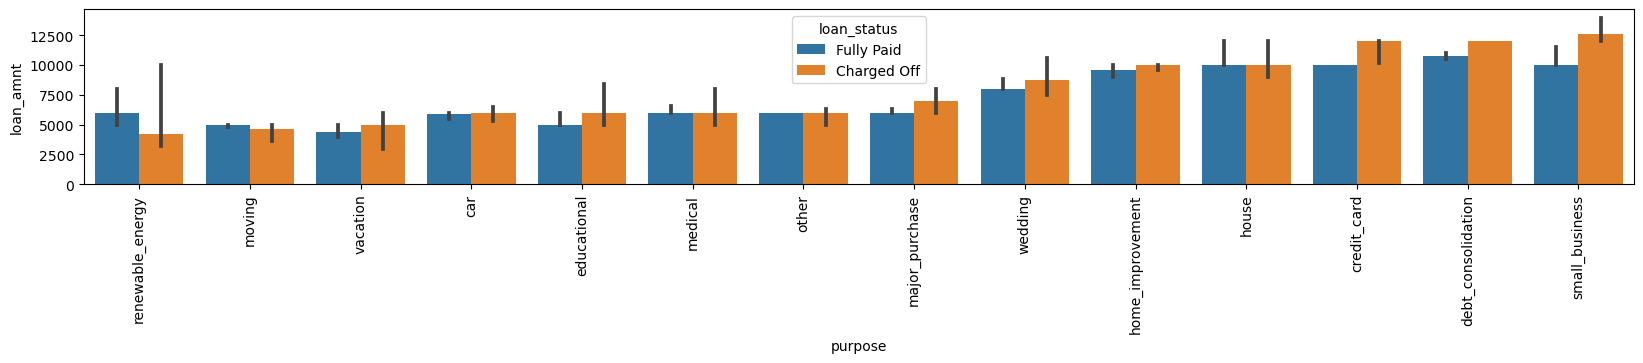

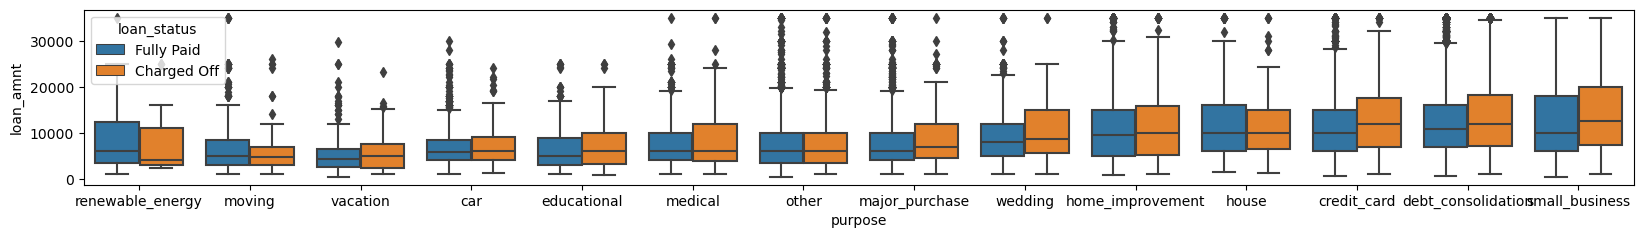

In [117]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

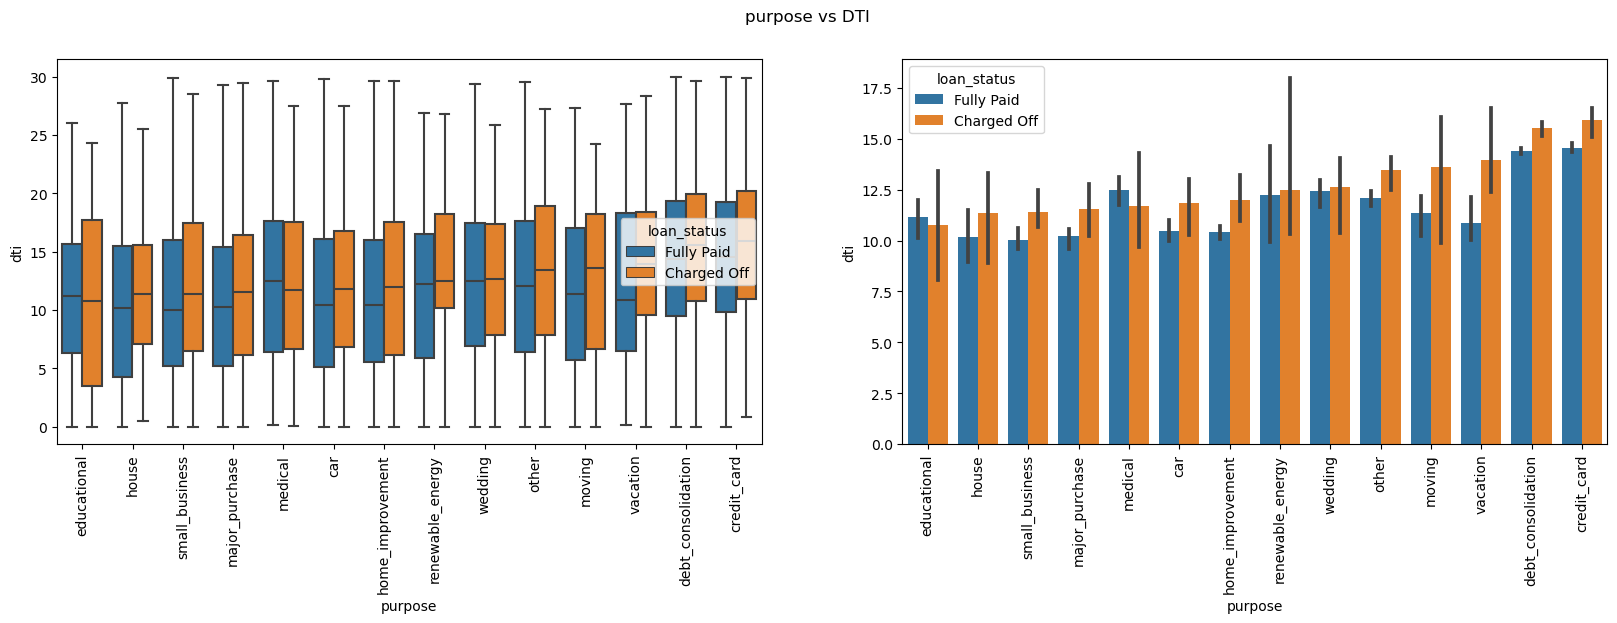

In [119]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan_data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=loan_data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
* Charged-off are higher for small_business comparitively.
* Small Business has more defaults when the loan amount is also high.
* Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

### Loan Amount vs Interest Rate

### Loan Amount vs Annual income

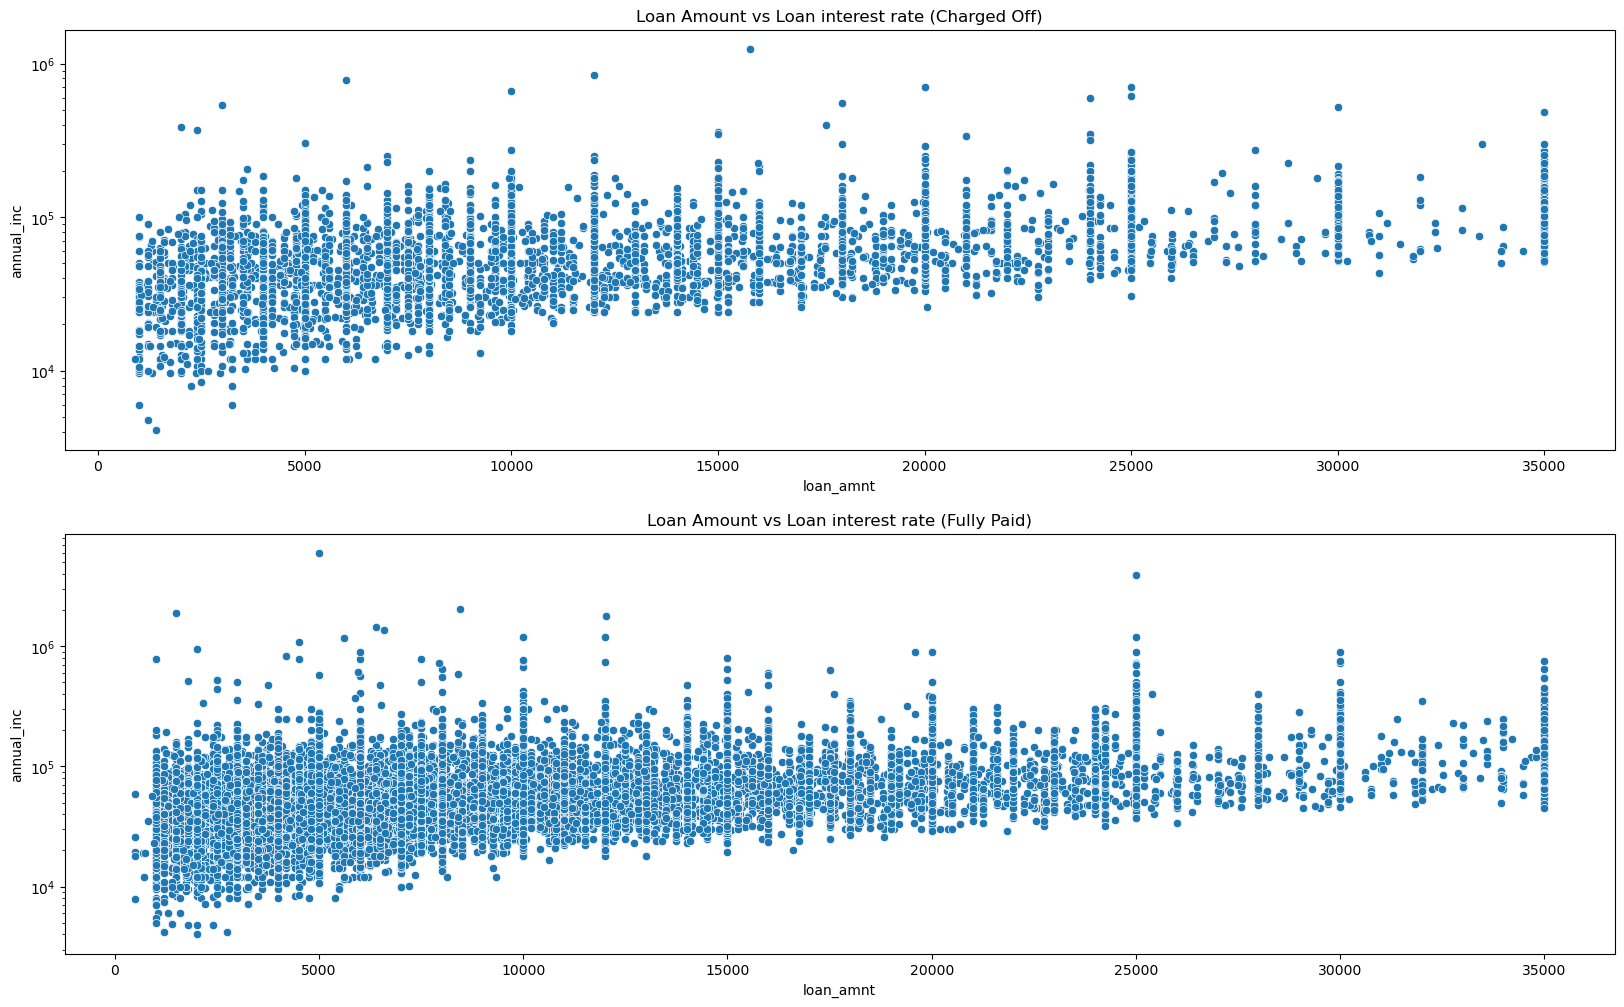

In [121]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

### Loan Amount vs DTI

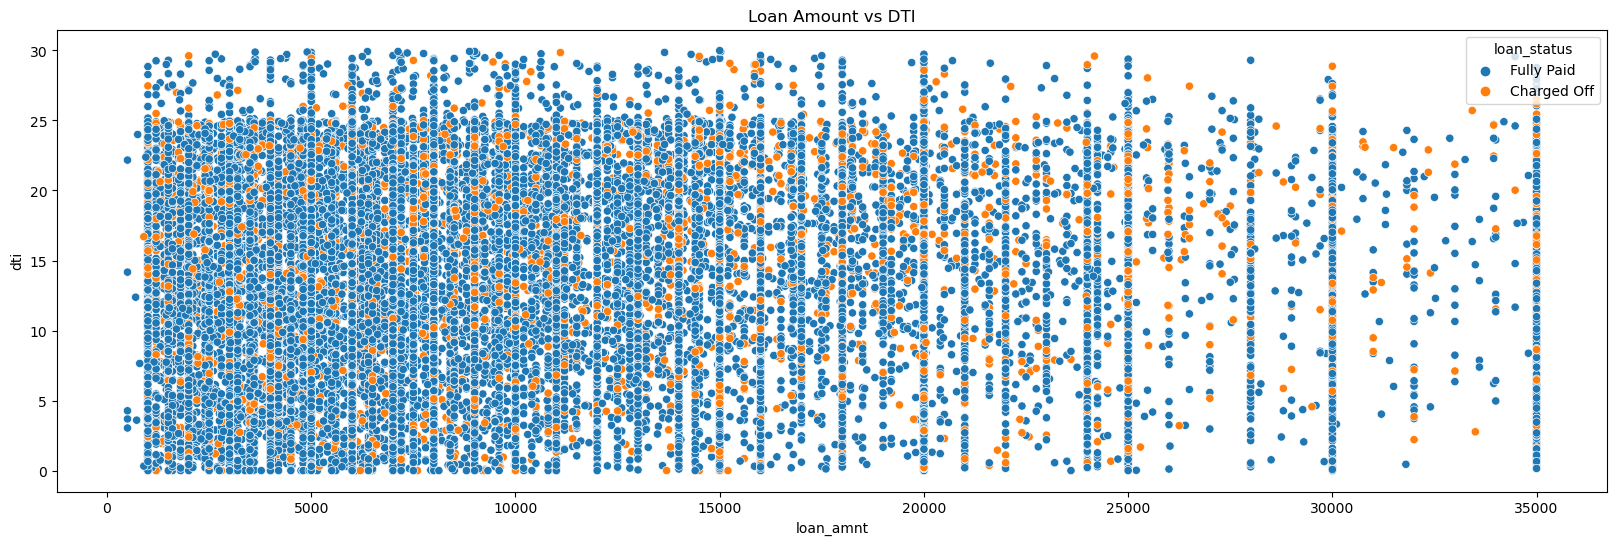

In [122]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=loan_data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

**Observations**  
Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.